# CHAPTER 2

## Exercise 2.5

Design and conduct an experiment to demonstrate the diculties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_{*}(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the $q_{*}(a)$ on each step).  Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, $\alpha = 0.1$. Use $\epsilon = 0.1$ and longer runs, say 10,000 steps.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm  

class k_armedBandit:
    
    def __init__(self,k):
        self.k=k
        self.nA = k
        self.mu = 0.0
        self.sigma = 0.01
        self._reset() #reset env
        
    
    
    def reset(self): #resets the environment-> new episode
        self._reset()
    
    def step(self, action): 
        return self._step(action) #performs a step
    
    def _step(self, action): #performs a step in the episode given an anction
        
        self.time_step = self.time_step + 1
        
        reward = self.reward(action)
        
        self.randomWalk() #performs random walk in Qs
        return reward
    

    def get_best_action(self):
        return np.argmax(self.Q)
    
    def _reset(self): #reset
        self.Q = np.zeros(self.k)# + np.random.normal(self.mu, 1)
        self.time_step = 0
        
    
    def reward(self, action):
        return np.random.normal(self.Q[action], 1)
    
    def randomWalk(self):
        self.Q = self.Q + np.random.normal(self.mu, self.sigma, self.k)
        
    
    

In [2]:
def e_greedy_action(Q, epsilon):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:a
        Q: action value function (array).
        epsilon: The probability to select a random action . float between 0 and 1.
    
    Returns:
        A function that returns an action.
    
    """
    def action():
        if np.random.uniform() < epsilon:
            return np.random.choice(len(Q))
        else:
            return np.random.choice(np.where(Q==np.max(Q))[0])
    return action

In [3]:

def simple_average(env, num_steps=10000, runs=2000, epsilon=0.1):
    """
    Function that performs simple average algorithm.
    
    Args:
        env: environment.
        num_steps: Number of steps to run for.
        runs: Number of runs.
        epsilon: Probability to sample a random action. Float between 0 and 1.
    
    Returns:
        Average rewards over runs.
        Percentage of optimal actions.
    """
    
    
    rewards = np.zeros(num_steps)
    optimal_act = np.zeros(num_steps)
    for run in tqdm(range(runs)):
        Q = np.zeros(env.nA)
        N = np.zeros(env.nA)
        e_action = e_greedy_action(Q, epsilon)
        
        env.reset()
        for i in range(num_steps):
       
            action = e_action() 
            reward = env.step(action)
            N[action] = N[action]+1
            Q[action] = Q[action] + (1/N[action]) * (reward - Q[action])
            rewards[i] = rewards[i] + reward
            optimal_act[i] = optimal_act[i] + (action == env.get_best_action())*1
        
    return rewards/runs, 100*optimal_act/runs

In [4]:

def weighted_average(env, num_steps=10000, runs=2000, alpha=0.1, epsilon=0.1):
    """
    Function that performs weighted average algorithm.
    
    Args:
        env: environment.
        num_steps: Number of steps to run for.
        runs: Number of runs.
        alpha: step size.
        epsilon: Probability to sample a random action. Float between 0 and 1.
    
    Returns:
        Average rewards over runs.
        Percentage of optimal actions.
    """
    
    
    rewards = np.zeros(num_steps)
    optimal_act = np.zeros(num_steps)
    
    for run in tqdm(range(runs)):
        Q = np.zeros(env.nA)
        e_action = e_greedy_action(Q, epsilon)
      
    
        env.reset()
        for i in range(num_steps):
       
            action = e_action() 
            reward = env.step(action)
            Q[action] = Q[action] + alpha * (reward - Q[action])
            rewards[i] = rewards[i] + reward
            optimal_act[i] = optimal_act[i] + (action == env.get_best_action())*1
        
    return rewards/runs, 100*optimal_act/runs

In [5]:
Bandit = k_armedBandit(10)

In [7]:
avg_reward_sa, optimal_action_sa = simple_average(Bandit)

100%|███████████████████████████████████████| 2000/2000 [33:15<00:00,  1.00it/s]


In [8]:
avg_reward_wa, optimal_action_wa = weighted_average(Bandit)

100%|███████████████████████████████████████| 2000/2000 [33:22<00:00,  1.00s/it]


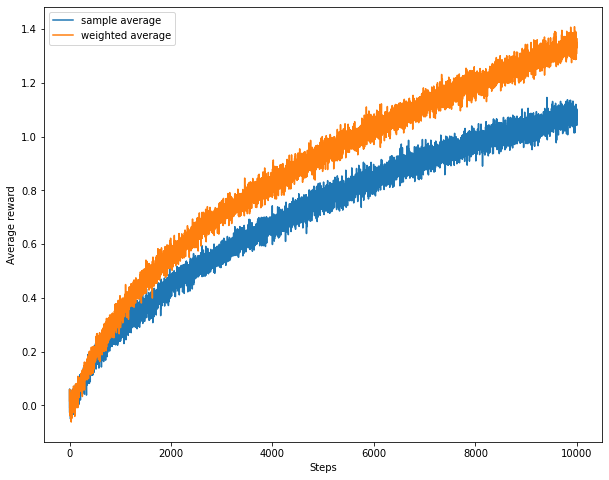

In [9]:
fig = plt.figure(figsize=(10, 8))
plt.plot(avg_reward_sa, label="sample average")
plt.plot(avg_reward_wa, label="weighted average")
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

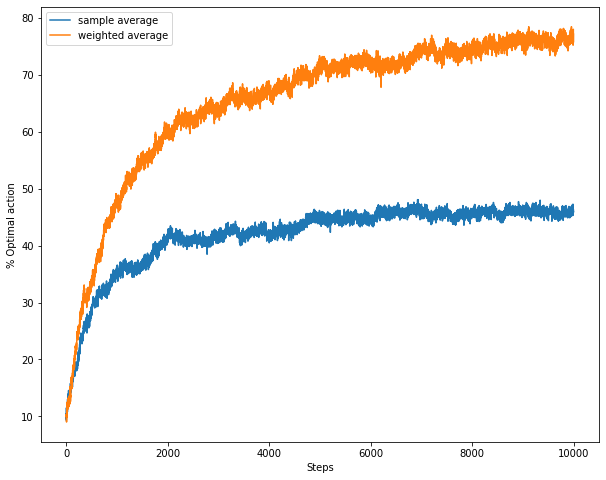

In [10]:
fig = plt.figure(figsize=(10, 8))
plt.plot(optimal_action_sa, label="sample average")
plt.plot(optimal_action_wa, label="weighted average")
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()
plt.show()

## Exercise 2.11

Make a figure analogous to Figure 2.6 for the nonstationary case outlined in Exercise 2.5. Include the constant-step-size $\epsilon$-greedy algorithm with $\alpha = 0.1$. Use runs of 200,000 steps and, as a performance measure for each algorithm and
parameter setting, use the average reward over the last 100,000 steps.

In [11]:

def simple_average2(env, num_steps=200000, epsilon=0.1):
    """
    Function that performs simple average algorithm.
    
    Args:
        env: environment.
        num_steps: Number of steps to run for.
        epsilon: Probability to sample a random action. Float between 0 and 1.
    
    Returns:
        Average rewards over last 10000 rewards.
    """
    
    
    Q = np.zeros(env.nA)
    N = np.zeros(env.nA)
    e_action = e_greedy_action(Q, epsilon)
    avg_reward = 0
    n=0
    env.reset()
    for i in range(num_steps):
       
        action = e_action() 
        reward = env.step(action)
        N[action] = N[action]+1
        Q[action] = Q[action] + (1/N[action]) * (reward - Q[action])
        if i > int(num_steps/2-1):
            n=n+1
            avg_reward = (1/n)*((n-1)*avg_reward + reward)
            
    return avg_reward

In [12]:

def weighted_average2(env, num_steps=200000, alpha=0.1, epsilon=0.1):
    """
    Function that performs weighted average algorithm.
    
    Args:
        env: environment.
        num_steps: Number of steps to run for.
        alpha: step size.
        epsilon: Probability to sample a random action. Float between 0 and 1.
    
    Returns:
        Average rewards over last 10000 rewards.
    """
    
    
    Q = np.zeros(env.nA)
    e_action = e_greedy_action(Q, epsilon)
    avg_reward = 0
    n=0
    env.reset()
    for i in range(num_steps):
       
        action = e_action() 
        reward = env.step(action)
        Q[action] = Q[action] + alpha * (reward - Q[action])
        if i > int(num_steps/2-1):
            n=n+1
            avg_reward = (1/n)*((n-1)*avg_reward + reward)
        
    return avg_reward

In [13]:
def UCB_action(Q, N, c):
    """
    Creates an ucb action selection based on a given Q-function N and c.
    
    Args:a
        Q: action value function (Q[state][action])
        N: Number of steps that an action has not occured.
        c: constant.
    
    Returns:
        A function that takes the time as an argument and returns
        an action.
    
    """
    def action(t):
        Ucb = Q + c * np.sqrt(np.log(t)/(N+1e-6))
        return np.random.choice(np.where(Ucb==np.max(Ucb))[0])
    return action

In [14]:

def UCB(env, num_steps=200000, alpha=0.1, c= 1/16):
    """
    Function that performs UCB algorithm.
    
    Args:
        env: environment.
        num_steps: Number of steps to run for.
        alpha: step size.
        c: constant.
    
    Returns:
        Average rewards over last 10000 rewards.
    """
    
   
    env.reset()
    Q = np.zeros(env.nA)
    N = np.zeros(env.nA)
    ucb_action = UCB_action(Q, N, c)
    avg_reward = 0
    n=0
   
    for i in range(num_steps):
       
        action = ucb_action(env.time_step+1) 
        reward = env.step(action)
        N[action] = N[action]+1
        Q[action] = Q[action] + alpha * (reward - Q[action])
        if i > int(num_steps/2-1):
            n=n+1
            avg_reward = (1/n)*((n-1)*avg_reward + reward)
        
    return avg_reward

In [15]:

def gradient_bandit(env, num_steps=200000, alpha=0.1):
    """
    Function that performs gradient bandit algorithm.
    
    Args:
        env: environment.
        num_steps: Number of steps to run for.
        alpha: step size.
    
    Returns:
        Average rewards over last 10000 rewards.
    """
    
   
    env.reset()
    H = np.zeros(env.nA) #preferences
    actions = np.arange(0,10)
    avg_reward = 0
    baseline = 0
    n=0
   
    for i in range(num_steps):
       
        pi = np.exp(H)/sum(np.exp(H)) #probs
        action = np.random.choice(actions,p=pi)
        reward = env.step(action)
        act_keep = np.zeros(env.nA)
        act_keep[action] = 1
        baseline = (1/(i+1))*(i*baseline + reward) #average reward baseline
        H = H + alpha * (reward - baseline)*(act_keep - pi)
        
        if i > int(num_steps/2-1):
            n=n+1
            avg_reward = (1/n)*((n-1)*avg_reward + reward)
        
    return avg_reward

In [16]:
def greedy_action(Q):
    """
    Creates greedy policy based on a given Q-function.
    
    Args:a
        Q: action value function (Q[state][action])
        
    Returns:
        A function that returns a greedy action.
    
    """
    def action():
        
        return np.random.choice(np.where(Q==np.max(Q))[0])
    return action

In [17]:

def greedy_optimistic(env, Q0 , num_steps=200000, alpha=0.1):
    """
    Function that performs greedy optimistic algorithm.
    
    Args:
        env: environment.
        Q0: initial Q vals.
        num_steps: Number of steps to run for.
        alpha: step size.
    
    Returns:
        Average rewards over last 10000 rewards.
    """
    
   
    Q = np.ones(env.nA)*Q0
    g_action = greedy_action(Q)
    avg_reward = 0
    n=0
    env.reset()
    for i in range(num_steps):
       
        action = g_action() 
        reward = env.step(action)
        Q[action] = Q[action] + alpha * (reward - Q[action])
        if i > int(num_steps/2-1):
            n=n+1
            avg_reward = (1/n)*((n-1)*avg_reward + reward)
        
    return avg_reward

In [18]:
#number of runs
runs = 100

In [19]:
epsilons = [2 ** x for x in range(-7, -1)]
mean_rewards_sa = np.zeros(len(epsilons))
for b in tqdm(range(runs)):
    i=0
    for epsilon in epsilons:
        mean_rewards_sa[i]= mean_rewards_sa[i] +  simple_average2(Bandit,num_steps = 20000,epsilon = epsilon)
        i=i+1
mean_rewards_sa = mean_rewards_sa/runs

100%|█████████████████████████████████████████| 100/100 [16:44<00:00, 10.05s/it]


In [20]:
epsilons = [2 ** x for x in range(-7, -1)]
mean_rewards_wa = np.zeros(len(epsilons))
for b in tqdm(range(runs)):
    i=0
    for epsilon in epsilons:
        mean_rewards_wa[i]= mean_rewards_wa[i] +  weighted_average2(Bandit,num_steps = 20000, epsilon = epsilon)
        i=i+1
mean_rewards_wa = mean_rewards_wa/runs

100%|█████████████████████████████████████████| 100/100 [16:01<00:00,  9.62s/it]


In [21]:
cs = [2 ** a for a in range(-4, 3)]
mean_rewards_ucb = np.zeros(len(cs))
for b in tqdm(range(runs)):
    i=0
    for c in cs:
        mean_rewards_ucb[i]= mean_rewards_ucb[i] +  UCB(Bandit,num_steps = 20000, c = c)
        i=i+1
mean_rewards_ucb = mean_rewards_ucb/runs 

100%|█████████████████████████████████████████| 100/100 [22:33<00:00, 13.53s/it]


In [22]:
alphas = [2 ** a for a in range(-5, 2)]
mean_rewards_gb = np.zeros(len(alphas))
for b in tqdm(range(runs)):
    i=0
    for alpha in alphas:
        mean_rewards_gb[i]= mean_rewards_gb[i] +  gradient_bandit(Bandit,num_steps = 20000, alpha = alpha)
        i=i+1
mean_rewards_gb = mean_rewards_gb/runs 

100%|█████████████████████████████████████████| 100/100 [28:10<00:00, 16.91s/it]


In [23]:
Q0s = [2 ** a for a in range(-2, 3)]
mean_rewards_go = np.zeros(len(Q0s))
for b in tqdm(range(runs)):
    i=0
    for Q0 in Q0s:
        mean_rewards_go[i]= mean_rewards_go[i] +  greedy_optimistic(Bandit,num_steps = 20000, Q0 = Q0)
        i=i+1
mean_rewards_go = mean_rewards_go/runs

100%|█████████████████████████████████████████| 100/100 [12:07<00:00,  7.28s/it]


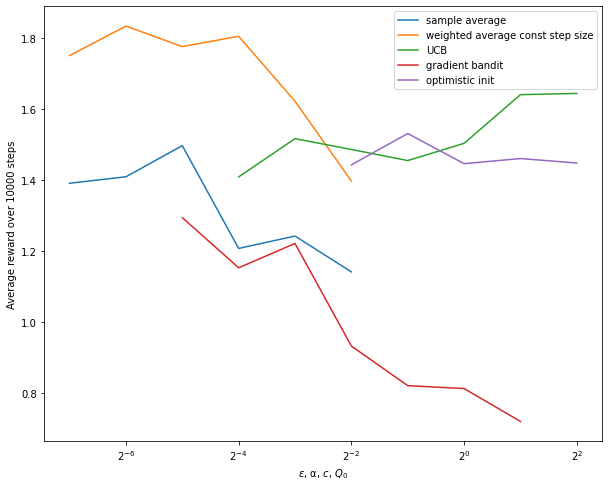

In [24]:
fig = plt.figure(figsize=(10, 8))
plt.plot(epsilons, mean_rewards_sa, label = "sample average")
plt.plot(epsilons, mean_rewards_wa, label = "weighted average const step size")
plt.plot(cs, mean_rewards_ucb, label = "UCB")
plt.plot(alphas, mean_rewards_gb, label = "gradient bandit")
plt.plot(Q0s, mean_rewards_go, label = "optimistic init")
plt.xscale('log', base=2)
plt.xlabel('$\epsilon$, α, $c$, $Q_0$')
plt.ylabel('Average reward over 10000 steps')
plt.legend()
plt.show()

# CHAPTER 4

## Exercise 4.7

Write a program for policy iteration and re-solve Jack’s car
rental problem with the following changes. One of Jack’s employees at the first location
rides a bus home each night and lives near the second location. She is happy to shuttle
one car to the second location for free. Each additional car still costs  \\$2, as do all cars
moved in the other direction. In addition, Jack has limited parking space at each location.
If more than 10 cars are kept overnight at a location (after any moving of cars), then an
additional cost of \\$4 must be incurred to use a second parking lot (independent of how
many cars are kept there). These sorts of nonlinearities and arbitrary dynamics often
occur in real problems and cannot easily be handled by optimization methods other than
dynamic programming. To check your program, first replicate the results given for the
original problem

Eg for one event to transition form $s,a$ to $s^{'}$: 

$s$: starting state $[n_1, n_2]$

$a$: performs and action a to move cars from $1\rightarrow 2$ or  $2\rightarrow 1$, state: $[n_1 - a, n_2 + a]$, reward:  $-2\lvert a \rvert$

With the this new state, $[n_1^{'}, n_2^{'}]$, the day starts.

In location 1: $n_{req1}$ cars requested with prob $P(n_{req1})$ drawn from poisson distribution with $\lambda=3$.

In location 2: $n_{req2}$ cars requested with prob $P(n_{req2})$ drawn from poisson distribution with $\lambda=4$.

This results in a new state $[n_1^{'}-n_{req1}, n_2^{'}-n_{req2}]$ and a total reward: $r = -2\lvert a \rvert + 10(n_{req1}+n_{req2})$ and happens with probability $p(r|sa)=P(n_{req1})P(n_{req2})$. From this we obtain $r(s,a) = \sum_r r p(r|sa)$ the averaged immediate reward of being in state $(s,a)$ when we loop through all the possible requests that can happen.

Finally,

In location 1: $n_{ret1}$ cars returned with prob $P(n_{ret1})$ drawn from poisson distribution with $\lambda=3$.

In location 2: $n_{ret2}$ cars returned with prob $P(n_{ret2})$ drawn from poisson distribution with $\lambda=2$.

This results in the final state $s^{'} = [n_1^{'}-n_{req1}+n_{ret1}, n_2^{'}-n_{req2}+n_{ret2}]$ and this particular combination of final state and reward has probability of occuring $p(s^{'}r|sa)=p(s^{'}|rsa)p(r|sa)=P(n_{ret1})P(n_{ret2})P(n_{req1})P(n_{req2})$. 

To find $p(s^{'}|sa) =\sum_r p(s^{'}r|sa)$ we sum all the probabilities that resulted in the state $s^{'}$ (all possible combinations that can $s^{'}$ occur with different rewards). Looping through all possible requests and returns we obtain $p(s^{'}|sa)$ for all $s^{'}$ states given that we was in $s$ and performed action $a$

In [1]:
#IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [2]:
#GLOBAL CONSTANTS OF THE PROBLEM 
MAX_CARS = 20
MAX_CARS_MOVE = 5
REWARD_MOVE = -2
REWARD_RENT = 10
GAMMA = 0.9
LAMDA_REQ = [3,4]
LAMDA_RET = [3,2]
ACTIONS = [i for i in range(-MAX_CARS_MOVE,MAX_CARS_MOVE+1)]
NON_LINEAR = True #TRUE FOR NON LINEARITIES



In [3]:
class Poisson_probs:
    
    """
        Class to get poisson probs. 
    
        Input: lamda and maximum number of cars
    
        Constructs a list with the probs
    """
  
    def __init__(self,lamda, max_cars):
        self.lamda = lamda
        self.max_cars = max_cars
        self.probs = []
        for n in range(self.max_cars):
            self.probs.append(poisson.pmf(n,lamda))
  
    def __getitem__(self, n):
        return self.probs[n] 

In [4]:
#create 4 poisson object for the 4 cases (loc1: request, return loc2: request, return)
req_prob_1 = Poisson_probs(LAMDA_REQ[0], MAX_CARS)
req_prob_2 = Poisson_probs(LAMDA_REQ[1], MAX_CARS)
ret_prob_1 = Poisson_probs(LAMDA_RET[0], MAX_CARS)
ret_prob_2 = Poisson_probs(LAMDA_RET[1], MAX_CARS)

In [5]:
def ptransition(state, action):
    

    """
        Function to get prob of transitions. 
    
        Input: state [i,j] and action -5,..,5
    
        Returns: p(s'|sa) and r(s,a)= Σ r p(r|sa)


    """
    reward = 0 #init reward to 0 
    state = [max(min(state[0]-action,MAX_CARS),0), max(min(state[1]+action,MAX_CARS),0)] #new state after perfoming an action of moving cars. This state is the state of starting the day
    reward = reward + REWARD_MOVE * abs(action) -(NON_LINEAR*1)*REWARD_MOVE*((action>0)*1) #reward for moving cars including the case when non linearities are present

    if (state[0]>10 or state[1]>10) and NON_LINEAR: #reward if non linearities are present
        reward = reward -4
  
    requests_prob_1 = req_prob_1[:state[0]] + [1 - sum(req_prob_1[:state[0]])] #req probs eg n= 2 p(0), p(1), 1-cmd(2)
    requests_prob_2 = req_prob_2[:state[1]] + [1 - sum(req_prob_2[:state[1]])]
    p_mat = np.zeros((MAX_CARS+1,MAX_CARS+1)) #matrix to store p(s'|sa) or p(i,j|sa) 21x21
    for n1_req, prob_req_1 in enumerate(requests_prob_1):
        for n2_req, prob_req_2 in enumerate(requests_prob_2):
            prob_req = prob_req_1*prob_req_2 #prob p(r|sa), to have a reward r in this state
            cars_loc1 = state[0] - n1_req #cars after removing those requested
            cars_loc2 = state[1] - n2_req
            cars_ret_loc1 = MAX_CARS - cars_loc1 #cars number available for return
            cars_ret_loc2 = MAX_CARS - cars_loc2

            reward_req = REWARD_RENT*(n1_req +n2_req) #reward for car requests n1 cars and n2 cars in loc1 loc2
        
            return_prob_1 = ret_prob_1[:cars_ret_loc1] + [1 - sum(ret_prob_1[:cars_ret_loc1])] #ret probs eg n= 2 p(0), p(1), 1-cmd(2)
            return_prob_2 = ret_prob_2[:cars_ret_loc2] + [1 - sum(ret_prob_2[:cars_ret_loc2])]
            reward = reward + prob_req*reward_req #total reward in state s,a averaged r(s,a)= Σ r p(r|sa)
            for n1_ret, prob_ret_1 in enumerate(return_prob_1):
                for n2_ret, prob_ret_2 in enumerate(return_prob_2):
                    new_state = [cars_loc1 + n1_ret, cars_loc2 + n2_ret] #new state after returning cars
                    prob = prob_req*prob_ret_1*prob_ret_2 # prob p(s'r|sa)
                    p_mat[new_state[0]][new_state[1]] =  p_mat[new_state[0]][new_state[1]]+prob #this prob increases because more than one combination can lead to the same s'

    return p_mat, reward #p(s'|sa) and r(s,a)= Σ r p(r|sa) avg reward 

In [6]:
def p_r_mat_full():
    """
    Function to get p(s'|sa) full matrix and r(s,a) full matrix (for each s,a). 
    Dimension is  21x21x11x21x21 ([s,a,s'] -> [[i,j],anctions, [m,k]]) and 21x21x11 [s,a] ->[[i,j],actions]. 
    p_mat : You input s,a ([i,j],a) in p_mat and gives you a 2d matrix where in each i,j = s' is the prob to transition in this state
    r_mat : You input s,a ([i,j],a) in r_mat and gives you a scalar which is the avg reward r(s,a)  

    
    Returns: p_mat and r_mat


    """
    p_mat = np.zeros((MAX_CARS+1,MAX_CARS+1,len(ACTIONS),MAX_CARS+1,MAX_CARS+1)) #init matrices
    r_mat = np.zeros((MAX_CARS+1,MAX_CARS+1,len(ACTIONS)))
  
  
    for i in range(MAX_CARS+1):
        for j in range(MAX_CARS+1):
            #print(i,j)
            act_up = min(min(MAX_CARS-j, ACTIONS[-1]), i) #this counts only valid action in each state eq [20,20] a=0 only
            act_low = -min(min(MAX_CARS-i, ACTIONS[-1]), j)
            for action in range(act_low, act_up+1):
                p_mat[i][j][action], r_mat[i][j][action]= ptransition([i,j], action) #fill matrices
  
    return p_mat, r_mat

In [7]:
#get transition probs p and rewards r for each s,a (i,j,a) pair p-5d matrix r-3d
p, r = p_r_mat_full()

In [8]:
#init of value function and policy, we use them as global variables in policy evaluation and improvement
V = np.zeros((MAX_CARS+1, MAX_CARS+1))
policy = V.copy().astype(int)

In [9]:
def policy_eval(theta=1e-8):
    """
    Evaluate a policy.

    
    Returns:
        Value function.
    """
    global V,policy
    global p, r
   
    while True:
        delta = 0
        #print(V)
        for i in range(V.shape[0]):
            for j in range(V.shape[1]):
                vold = V[i,j]
                
                vnew = r[i][j][policy[i,j]]+GAMMA*(p[i][j][policy[i,j]]*V).sum()
                V[i,j]=vnew
                delta = max(delta, abs(vold-V[i,j]))
        #print(delta)
        if delta<theta:
            break
    print("delta: ",delta)
    return np.array(V)

In [10]:
def policy_improvement(policy_eval=policy_eval):
    """
    Policy Improvement Algorithm. Iteratively evaluates and improves a policy
    until an optimal policy is found.
    
   
        
    """
    # Start with a random policy

    global policy, r

    iter=0
    while True:
        print("Iteration ",iter)
        
        ####ploting############
        plt.imshow(policy)
        plt.gca().invert_yaxis()
        plt.colorbar()
        plt.title(f"Policy"+str(iter))
        plt.xlabel("Number of cars at location 2")
        plt.ylabel("Number of cars at location 1")
        plt.yticks(np.arange(0, 21, 5))
        plt.xticks(np.arange(0, 21, 5))
        plt.show()
        ###########################

        V = policy_eval()
        iter=iter+1
        

        #policy impovement
        policy_stable = True
        for i in range(V.shape[0]):
            for j in range(V.shape[1]):
                old_action = policy[i,j]
                Max = float('-inf')
                argmax = 0
                
                act_up = min(min(MAX_CARS-j,ACTIONS[-1]),i) #takes into account only valid actions in each state
                act_low = -min(min(MAX_CARS-i,ACTIONS[-1]),j)
                for action in range(act_low, act_up+1):
                    temp = r[i][j][action]+GAMMA*(p[i][j][action]*V).sum()
                    if temp>Max:
                        Max = temp
                        argmax = action
                policy[i,j] = argmax
               
                if old_action != policy[i,j]:
                    policy_stable = False
    
        if policy_stable:
            print("Best policy evaluation")
            V = policy_eval() #value function for best policy
            break
    
    #return policy, V

Iteration  0


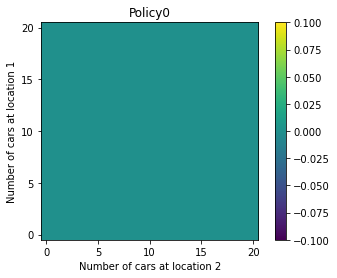

delta:  9.013263024826301e-09
Iteration  1


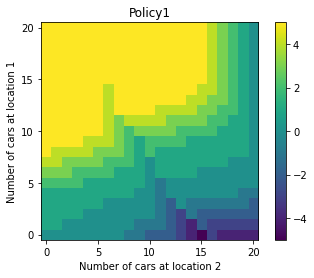

delta:  9.854375093709677e-09
Iteration  2


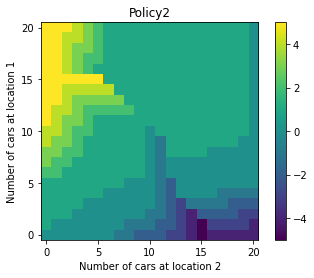

delta:  9.770985798240872e-09
Iteration  3


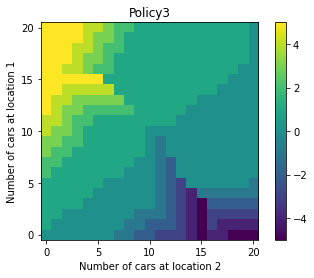

delta:  8.19778733784915e-09
Iteration  4


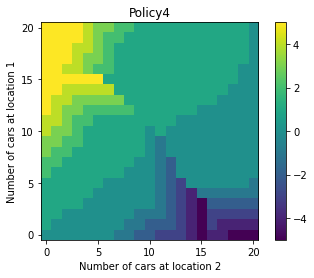

delta:  9.107566256716382e-09
Best policy evaluation
delta:  7.445180472132051e-09


In [11]:
policy_improvement()

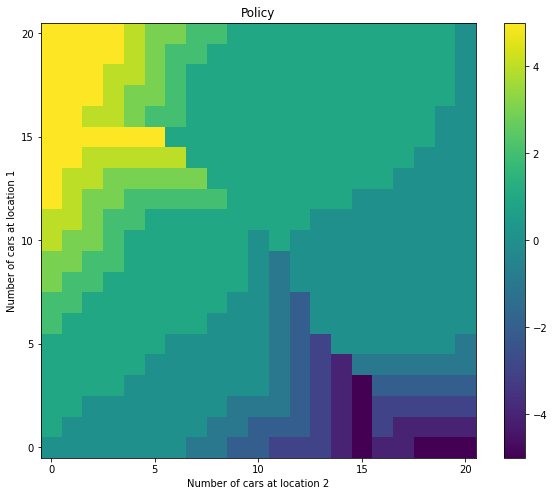

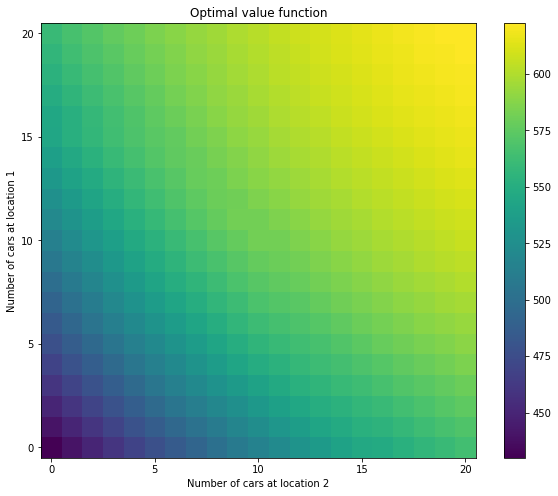

In [12]:
#Plot optimal policy and value function
fig = plt.figure(figsize=(10, 8))
plt.imshow(policy)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title(f"Policy")
plt.xlabel("Number of cars at location 2")
plt.ylabel("Number of cars at location 1")
plt.yticks(np.arange(0, 21, 5))
plt.xticks(np.arange(0, 21, 5))
plt.show()


fig = plt.figure(figsize=(10, 8))
plt.imshow(V)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title(f"Optimal value function")
plt.xlabel("Number of cars at location 2")
plt.ylabel("Number of cars at location 1")
plt.yticks(np.arange(0, 21, 5))
plt.xticks(np.arange(0, 21, 5))
plt.show()

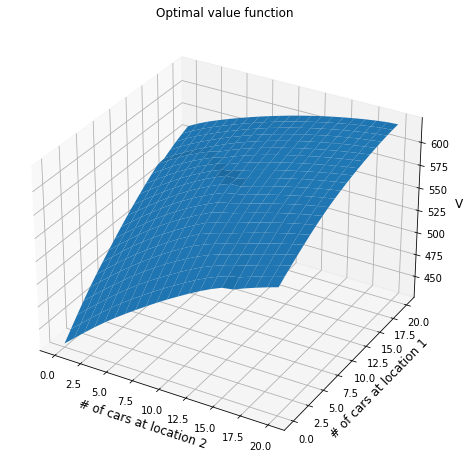

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
X = np.arange(0, MAX_CARS + 1)
Y = np.arange(0, MAX_CARS + 1)
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, V)
ax.set_xlabel('# of cars at location 2', fontsize=12)
ax.set_ylabel('# of cars at location 1', fontsize=12)
ax.set_zlabel('V', fontsize=12)
ax.set_title('Optimal value function')
plt.show()

## Exercise 4.9

Implement value iteration for the gambler’s problem and
solve it for $ph = 0.25$ and $ph = 0.55$. In programming, you may find it convenient to
introduce two dummy states corresponding to termination with capital of 0 and 100,
giving them values of 0 and 1 respectively. Show your results graphically, as in Figure 4.3. Are your results stable as $\theta \rightarrow 0$?

Note: to run for the cases $ph = 0.25$ and $ph=0.55$ just change the GLOBAL CONST PH below.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#GLOBAL CONSTANTS
NUM_STATES = 100
PH = 0.4
GAMMA = 1

In [3]:
#init of value function and policy, we use them as global variables in policy evaluation and improvement
V = np.zeros((NUM_STATES+1))
policy = np.zeros((NUM_STATES+1),dtype=int)

In [4]:

def ptransition(state, action):
    """
        Function to get prob of transitions. 
    
        Input: state  and action 
    
        Returns: p(s'|sa) and r(s,a)= Σ r p(r|sa)


    """
    p_mat = np.zeros((NUM_STATES+1)) #init matrix
    
    p_mat[state+action] = PH #new state if heads
    p_mat[state-action] = 1 - PH #new state if tails
    
    if state+action == 100: #if at the end give reward 1 (with prob ph). r(s,a) = ph*r(s+a) + (1-ph)*r(s-a), r(s) reward transitioning to s
        reward = PH*1 
    else:
        reward = 0
    
    return  p_mat, reward # p(s'|sa) r(s,a)
        
    

In [5]:
def actions(state):
    """
        Function that returns posible actions for given state. 
    
        Input: state  
    
        Returns: actions


    """
    m = min(state,100-state)
    return np.arange(0,m+1)

In [6]:
def value_iteration(theta=1e-8):
    """
    Value Iteration Algorithm.
    
    Args:
        
        theta: We stop evaluation once our value function change is less than theta for all states.
        
        
    Returns:
        A list with V for the required sweeps for plotting.        
    """
    
    global V,policy
    i=0
    V_sweeps = []
    while True:
        delta = 0
        i=i+1
        print("sweep ",i)
        for s in range(0,V.shape[0]-1):
            vold = V[s]
            Vmax = float('-inf')
            argmax = 0
            for action in actions(s):
                p,r = ptransition(s,action)
                temp = r + GAMMA*(p*V).sum()
                
                if round(temp,10)>round(Vmax,10): #need for good plot to compare to 10 decimals
                    
                    Vmax = temp
                    argmax = action
            V[s] = Vmax
            policy[s] = argmax
            delta = max(delta, abs(vold-V[s]))
        #print(delta)
        if i==1 or i==2 or i==3:
            V_sweeps.append((np.copy(V),i))
        if delta<theta:
            break
    V_sweeps.append((np.copy(V),i))        
    
    return V_sweeps

In [7]:
V_sweeps = value_iteration()

sweep  1
sweep  2
sweep  3
sweep  4
sweep  5
sweep  6
sweep  7
sweep  8
sweep  9
sweep  10
sweep  11
sweep  12
sweep  13
sweep  14
sweep  15


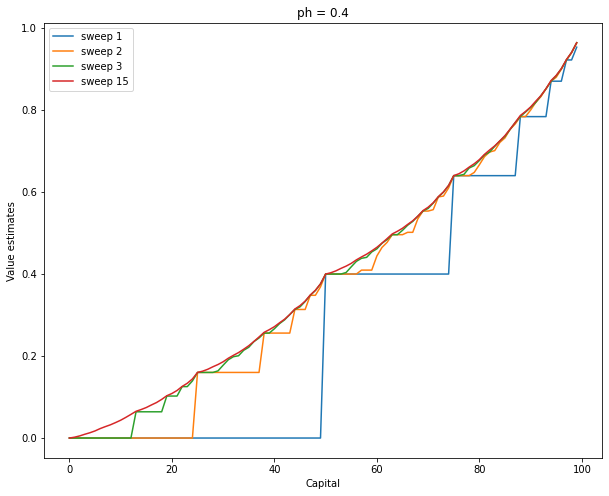

In [8]:
#plot value function
fig = plt.figure(figsize=(10, 8))
plt.plot(V_sweeps[0][0][:-1], label = "sweep " +str(V_sweeps[0][1]))
plt.plot(V_sweeps[1][0][:-1], label = "sweep " +str(V_sweeps[1][1]))
plt.plot(V_sweeps[2][0][:-1], label = "sweep " +str(V_sweeps[2][1]))
plt.plot(V_sweeps[3][0][:-1], label = "sweep " +str(V_sweeps[3][1]))
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.title('ph = '+ str(PH))
plt.legend()
plt.show()

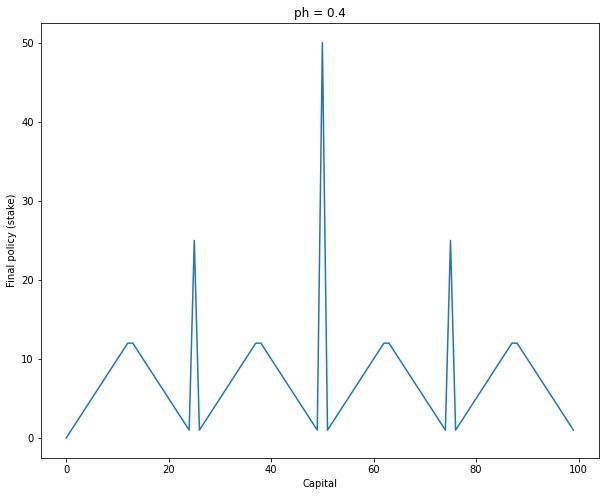

In [9]:
#plot optimal policy
fig = plt.figure(figsize=(10, 8))
plt.plot(policy[:-1])
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.title('ph = '+ str(PH))
plt.show()

# CHAPTER 5

## Exercise 5.12

Consider driving a race car around a turn like those shown in Figure 5.5. 

![FIGURE5_5](Figure5_5.png)

You want to go as fast as possible, but not so fast as to run off the track. In our simplified racetrack, the car is at one of a discrete set of grid positions, the cells in the diagram. The velocity is also discrete, a number of grid
cells moved horizontally and vertically per time step. The actions are increments to the velocity components. Each may be changed by $+1$, $1$, or $0$ in each step, for a total of nine $(3\times3)$ actions.  Both velocity components are restricted to be nonnegative and less than $5$, and they cannot both be zero except at the starting line. Each episode begins in one of the randomly selected start states with both velocity components zero and ends when the car crosses the finish line.  The rewards are $-1$ for each step until the car crosses the finish line. If the car hits the track boundary, it is moved back to a random position on the starting line, both velocity components are reduced to zero, and the episode continues. Before updating the car’s location at each time step, check to see if the projected path of the car intersects the track boundary. If it intersects the finish line, the episode ends; if it intersects anywhere else, the car is considered to have hit the track boundary and is sent back to the starting line. To make the task more challenging, with probability $0.1$ at each time step the velocity increments are both zero, independently of the intended increments. Apply a Monte Carlo control method to this task to compute the optimal policy from each starting state. Exhibit several trajectories following the
optimal policy (but turn the noise off for these trajectories).




Note: Depending on the hyperparameters initialization different trajectories may occur. I used a reward if car goes to the boundary of -5 and also epsilon 0.4 to allow expolaration. Otherwise the agent when is in the last cell in finishline learns to hit the boundary and begin from a new random position and then finish.

In [1]:
#import libraries
import numpy as np 
from matplotlib import pyplot as plt
from tqdm import tqdm 

#GLOBAL CONSTANTS

###VALUES FOR THE RACETRACK MATRIX###
TRACK_VAL = 0 
START_VAL = 2
FINISH_VAL = 3
BOUNDARY_VAL = 1
CAR_VAL = 4
#####PROBLEM DATA####
MAX_VEL = 4
GAMMA=1.0
EPSILON = 0.4 #TO ALLOW EXPLORATION, SLOWS DOWN TRAINING
NUM_EPISODES = 100000
REWARD = -1
REWARD_BDR = -5 #I PUT THIS REWARD BECAUSE OTHERWISE THE CAR 
#WHEN IS AT THE START LINE AND LAST POSITION HITS THE BOUNDARY
#TO GO TO ANOTHER STARTING POSITION TO CONTINUE, THIS MAY REDUCE TRAINING TIME
ZERO_INC = False #to include prob of zero velocity increment at each step 
PROB = 0.1

ACTION_TO_INCREMENTS = {
            0: [-1, -1],
            1: [-1, 0],
            2: [-1, 1],
            3: [0, -1],
            4: [0, 0],
            5: [0, 1],
            6: [1, -1],
            7: [1, 0],
            8: [1, 1]
        }

In [2]:
class tracks:
    """
    A class to generate the racetracks of the exercise. 
    Choice 0: first track, Choice 1 = second track.
    Also includes ploting the recetrack.
    
   
        
    """

    def __init__(self, choice:bool):
        self.get_track(choice)

    def get_track(self, choice):

        if not(choice):
            track = np.ones((32, 17)) 
            track[-1,3:9] = START_VAL #start val
            track[:6, -1] = FINISH_VAL #finish val
            track[:-1,3:9] = TRACK_VAL
            track[1:-3,2:3]=TRACK_VAL
            track[3:-10,1:2]=TRACK_VAL
            track[4:14,0:1] = TRACK_VAL
            track[:6,5:-1] = TRACK_VAL
            track[6,9] = TRACK_VAL
            self.track = track
            self.string = "track 1 "
        else:
            track = np.ones((30, 32))
            track[-1,:23] = START_VAL
            track[-3:-1,:23]=TRACK_VAL
            track[:9,-1] = FINISH_VAL
            for i in range(1,15):
                track[-3-i,i:23]= TRACK_VAL
            track[12,14:24]= TRACK_VAL
            track[11,14:26]= TRACK_VAL
            track[10,14:27]= TRACK_VAL
            track[9,14:30]= TRACK_VAL
            track[8,13:31]= TRACK_VAL
            track[7,12:31]= TRACK_VAL
            for i in range(3,7):
                track[i,11:31]= TRACK_VAL
            track[2,12:31]= TRACK_VAL
            track[1,13:31]= TRACK_VAL
            track[0,16:31]= TRACK_VAL
            self.track = track
            self.string = "track 2 "
    def plot_track(self, episode = [], reward = None):
        track = np.copy(self.track)
        string = ""
        if episode:
            for coord in episode:
                track[coord] = CAR_VAL #car value
            string = "total reward = "+str(reward)
            if ZERO_INC==True:
                string = string + " Zero increments with prob " + str(PROB)
        plt.figure(figsize=(10, 5), dpi=150)
        plt.pcolormesh(track, edgecolors='k', linewidth=2)
        plt.title(self.string+str(string))
        ax = plt.gca()
        ax.set_aspect('equal')
        ax.invert_yaxis()
        plt.show()


In [3]:
class Racetrack:
    """
    A class to generate the racetracks enviroment requested in the exercise. 
    
    """
    
    def __init__(self, track):
        
        self.track = track #track race matrix
        self._reset()  #reset env
        self.nA = 9 #numver of actions
        self.nS = (*self.track.shape, MAX_VEL+1, MAX_VEL+1) #shape of the states (including position in the track and vx vy)
        # vx vy 5 states because they restricted to be both positive and less than 5
        self.H, self.W = self.track.shape #height and width of the racetrack
        
        
        
    def reset(self): #resets the game-> new episode
        return self._reset()
    
    def step(self, action): 
        return self._step(action) #performs a step
    
    def _step(self, action): #performs a step in the episode given an anction, action [] list -1,0,1 -1,0,1
        
        acc = ACTION_TO_INCREMENTS[action]
        if ZERO_INC and np.random.rand() <= PROB:
            acc = [0,0]
        vy = self.velocity[0] + acc[0] #horizontal
        vx = self.velocity[1] + acc[1] #vertical
        
        #update velocity
        self.velocity = [vy, vx]
        
        
        #temp_pos = [self.position[0]+vy, self.position[1]+vx]

        temp_pos = [self.position[0]+self.velocity[0], self.position[1]+self.velocity[1]]
        
        
        
        
        
        #check if track went to finish line
        
        if self._check_finish(temp_pos):
            done = True
            reward = 0
        
        #check if it went beyond the boundary
        elif self._check_boundary(temp_pos):
            done = False
            self.reset()
            reward = REWARD_BDR
        
        else:
            self.position = temp_pos
            reward = REWARD
            done = False
       
   
        
        
        return self._get_obs(), reward, done #gives state, reward and if the episode is over 
    
    def _check_boundary(self, state):
        #checks if the state went out of the grid
        if state[0]<0 or state[1]>self.H:
            return True
        
        #checks if the state went out of the boundary
        if self.track[state[0]][state[1]] == BOUNDARY_VAL:
            return True
       
        #check if the projected path of the trajectory is inside the track
        for y in range(self.position[0], state[0]+1, -1):
            for x in range(self.position[1], state[1]+1):
                if self.track[y][x] == BOUNDARY_VAL:
                    return True
        return False
    
    def _check_finish(self, state):
        #check if car finishes
        finish_row, finish_col = np.where(self.track == FINISH_VAL)
        
        if  state[0] in finish_row and state[1]>=max(finish_col):
            return True
        else:
            return False
    
    def _get_obs(self): #get current state (position on the track), velocity components vx, vy
        return (*self.position, *self.velocity)

    def _reset(self): #reset game
        self.position = [self.track.shape[0]-1, np.random.choice(np.where(self.track[-1]== START_VAL)[0])] #y,x position
        self.velocity = [0, 0]
        return self._get_obs() #returns the state    

In [4]:
#gives the valid action on a state in order to be consistent with the constraints of the problem eq
#vy, vx<5 and not both zero
def valid_actions(observation):
    vy, vx = observation[2], observation[3]
    valid_acts = []
    for key, value in ACTION_TO_INCREMENTS.items():
        vy_temp = vy + value[0]
        vx_temp = vx + value[1]
        if vy_temp<=0 and vy_temp>-5 and vx_temp>=0 and vx_temp<5 and not(vy_temp == 0 and vx_temp ==0):
            valid_acts.append(key)
    return valid_acts

In [5]:
def e_greedy_policy(Q, epsilon):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:a
        Q: action value function (Q[state][action])
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the action and the probabilities for each action.
    
    """
    
   
    
    def policy_fn(observation):
        
      #  greedy_action =valid_acts[np.random.choice(np.where(Q[observation][(valid_acts)]==Q[observation][(valid_acts)].max())[0])]
    
        valid_acts = valid_actions(observation)
        greedy_action =  valid_acts[np.argmax(Q[observation][(valid_acts)])]
        #greedy_action =valid_acts[np.random.choice(np.where(Q[observation][(valid_acts)]==Q[observation][(valid_acts)].max())[0])]

        nA = len(valid_acts)
        if np.random.uniform() < epsilon:
            action = np.random.choice(valid_acts)
            
            if action == greedy_action:
                return action, 1-epsilon + epsilon/nA
            else:
                return action, epsilon/nA
        else:
            return greedy_action, 1-epsilon + epsilon/nA
        
        
    return policy_fn

In [6]:
def policy_target(Q):
    """
    Creates the greedy policy based on a given Q-function.
    
    Args:
        Q: action value matrix (Q[state][action])
    
    Returns:
        A function that takes the observation as an argument and returns
        the greedy action
    
    """
    
    def policy_t(observation):

        valid_acts = valid_actions(observation) 
                
        action = valid_acts[np.argmax(Q[observation][(valid_acts)])]
        return action
        
    return policy_t

In [7]:
def monte_carlo_off_policy(env, epsilon, num_episodes, gamma):
    """
    Monte Carlo Control off policy algorithm using Epsilon-Greedy behaviour policy.
    Finds an optimal greedy policy.
    
    Args:
        env: Enviroment.
        num_episodes: Number of episodes to sample.
        gamma: Gamma discount factor.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, policy, reward_list).
        
    
    """
    Q = np.random.uniform(size=(*env.nS,env.nA)) #initialize Q, C
    #Q = np.random.normal(100,size = (*env.nS,env.nA))  
    #Q = np.zeros((*env.nS,env.nA))
    Q = Q -  500 #needs to be negative and large
    C = np.zeros((*env.nS,env.nA))  

    policy_t = policy_target(Q)
    #behaviour policy (ε-soft policy)
    policy_b = e_greedy_policy(Q, epsilon)
    reward_list = np.zeros(shape=(num_episodes), dtype=np.float32)
    for i in tqdm(range(num_episodes)):
        

    #generate episode
        init_s = env.reset() #init state
    
        action, action_prob = policy_b(init_s)#choose action from the prob dist of available actions
        observation, reward, done = env.step(action)
        episode = [(init_s, action, action_prob,reward)] #S0,A0,R1
        
        total_reward = reward
        while(done == False): #if episode not done generate the rest S,A,R pairs
            last_obs = observation
            
            
            action, action_prob = policy_b(observation)
            observation, reward, done = env.step(action)
            
            episode.append((last_obs, action, action_prob, reward))
            total_reward += reward
            
        
        G = 0 #init return to 0
        W = 1.       #calculate the reward G for each state encountered
        for state, action, action_prob,R in reversed(episode):
            G = gamma*G + R
           
            C[state][action] = C[state][action] + W
            Q[state][action] = Q[state][action] + (W/C[state][action])*(G - Q[state][action])

            
            policy_t = policy_target(Q)
            if action != policy_t(state):
                break
            W = W * 1/action_prob
        reward_list[i] = total_reward
       
        policy_b = e_greedy_policy(Q, epsilon)
  
    return Q, policy_t,reward_list

In [8]:
def generate_episodes(env, policy, num_episodes):
    """
    Function to generate an episode after training.
    
    Args:
        env: Enviroment.
        num_episodes: Number of episodes to sample.
        policy: the policy to choose action from (optimal greedy)
    
    Returns:
        list of episodes
        
    
    """
    episodes = []
    rewards = []
    for i in tqdm(range(num_episodes)):
        #print(1)
        

    #generate episode
        init_s = env.reset() #init state
    
        action = policy(init_s)#choose action from the prob dist of available actions
        observation, reward, done = env.step(action)
        episode = [(init_s[0],init_s[1])] #S0,A0,R1
        total_reward = reward
        while(done == False): #if episode not done generate the rest S,A,R pairs
            
            last_obs = observation
            action = policy(observation)
        
            observation, reward, done = env.step(action)
            episode.append((last_obs[0],last_obs[1]))
            total_reward += reward
        episodes.append(episode)
        rewards.append(total_reward)
    return episodes, rewards

### Track 1 case

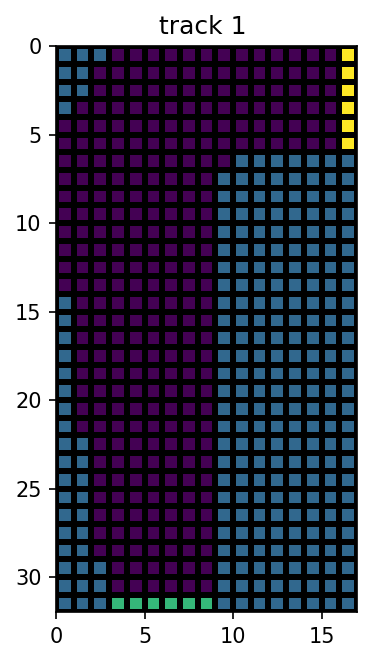

In [9]:
#init track1
track1= tracks(0)
track1.plot_track()

In [10]:
env = Racetrack(track1.track)
Q, policy_t, reward_list = monte_carlo_off_policy(env, EPSILON, NUM_EPISODES, GAMMA)

100%|██████████████████████████████████| 100000/100000 [13:25<00:00, 124.10it/s]


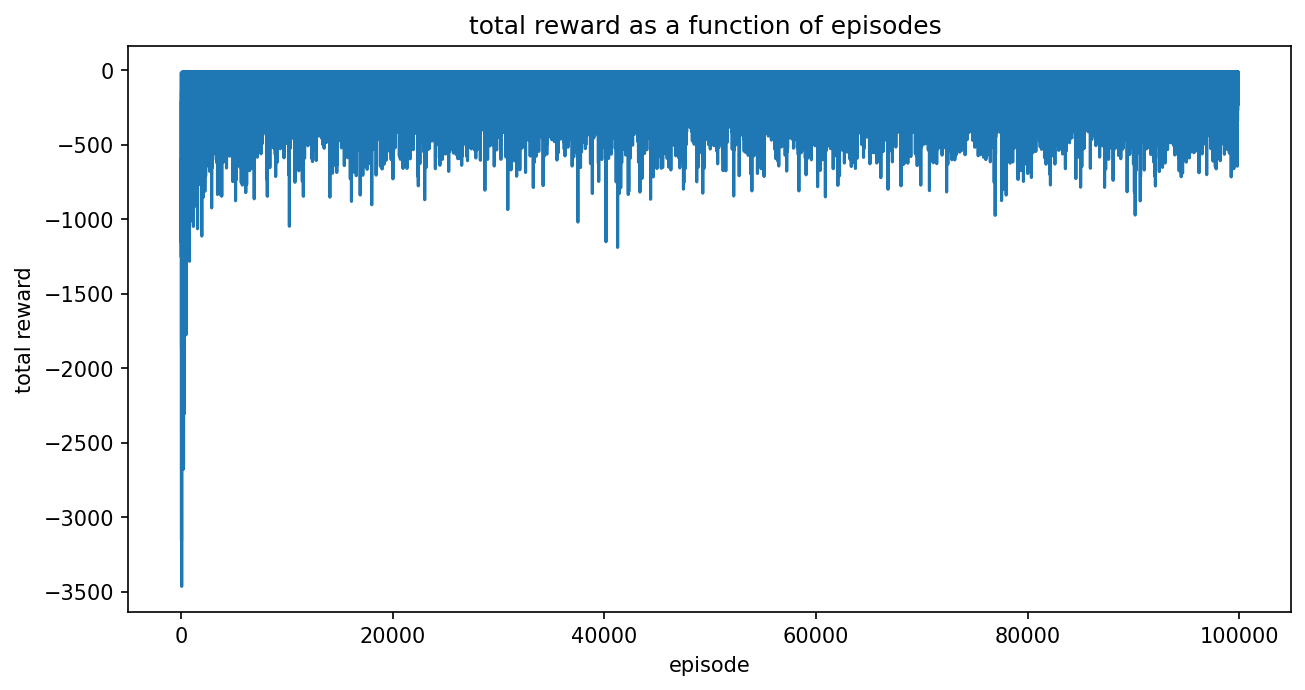

In [11]:
if ZERO_INC == True:
    string = "with zero incremetes, prob "+str(PROB)
else:
    string = ""
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(reward_list[100:])
plt.xlabel('episode')
plt.title('total reward as a function of episodes ' + str(string))
plt.ylabel('total reward')
plt.show()

In [12]:
#generate episodes with optimal policy
episodes, reward = generate_episodes(env, policy_t, 5)

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 604.59it/s]


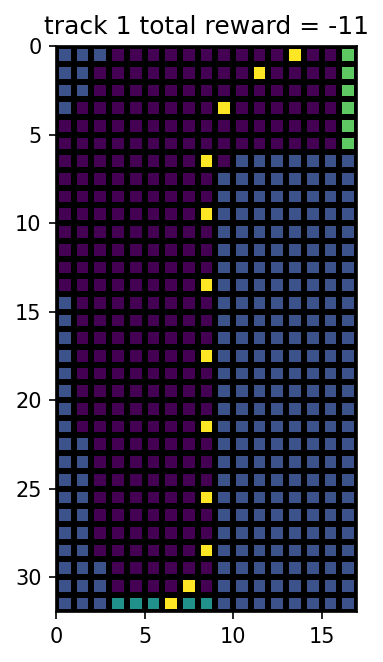

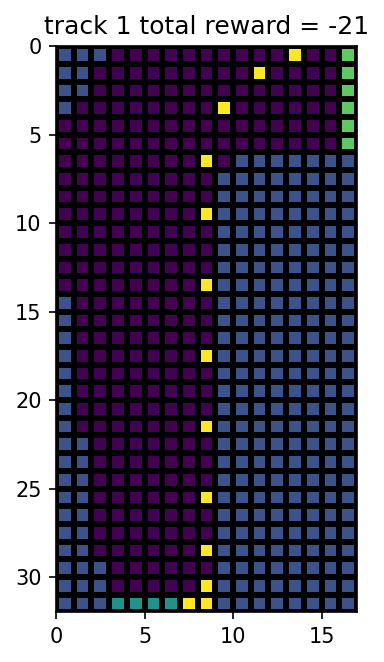

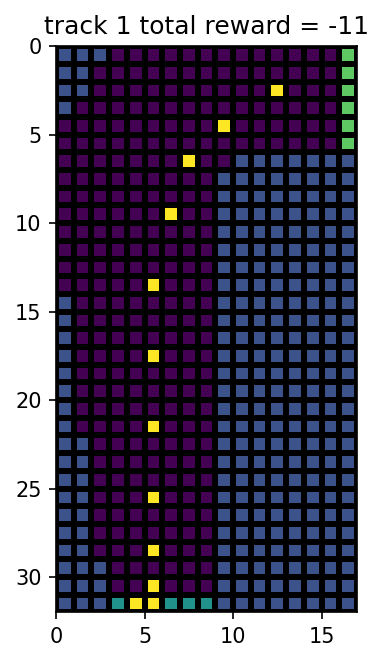

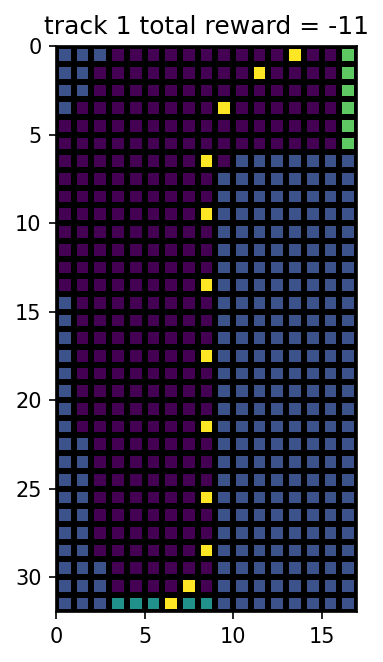

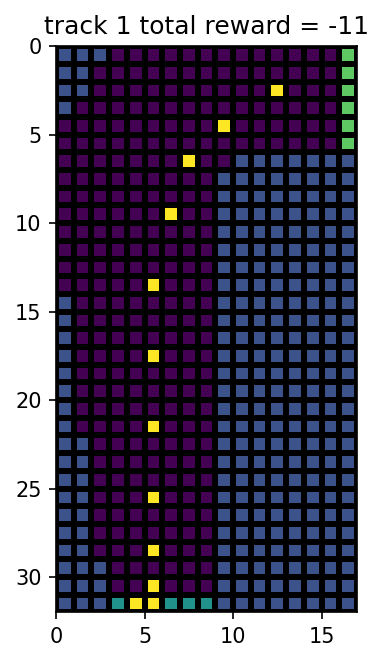

In [13]:
for ind, ep in enumerate(episodes):
    
    track1.plot_track(ep,reward[ind])

### Track 2 case

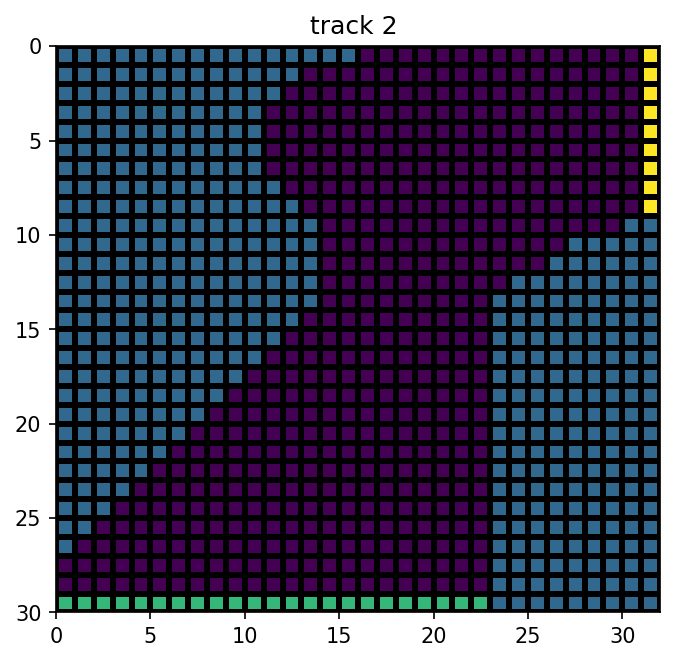

In [14]:
#init track2
track2= tracks(1)
track2.plot_track()

In [15]:
env = Racetrack(track2.track)
Q, policy_t, reward_list = monte_carlo_off_policy(env, EPSILON, NUM_EPISODES, GAMMA)

100%|██████████████████████████████████| 100000/100000 [06:13<00:00, 267.53it/s]


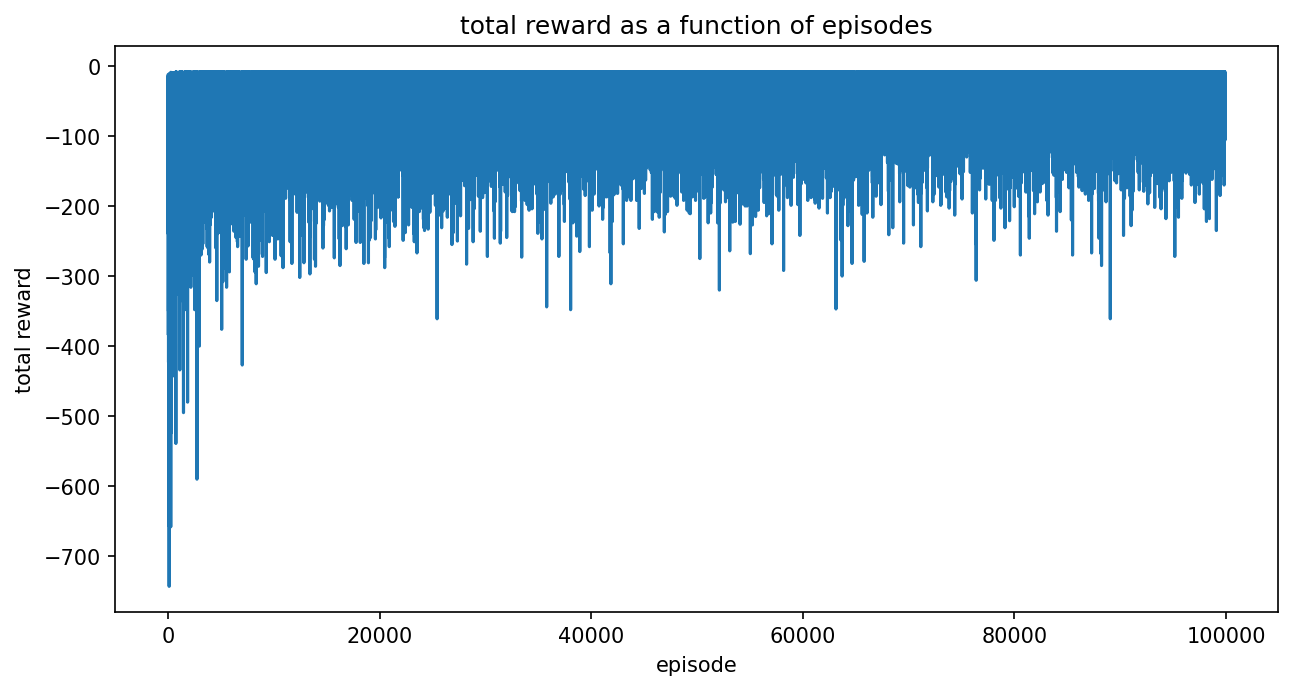

In [16]:
if ZERO_INC == True:
    string = "with zero incremetes, prob "+str(PROB)
else:
    string = ""
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(reward_list[100:])
plt.xlabel('episode')
plt.title('total reward as a function of episodes' + str(string))
plt.ylabel('total reward')
plt.show()

In [17]:
#generate episodes with optimal policy
episodes, reward = generate_episodes(env, policy_t, 5)

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 868.53it/s]


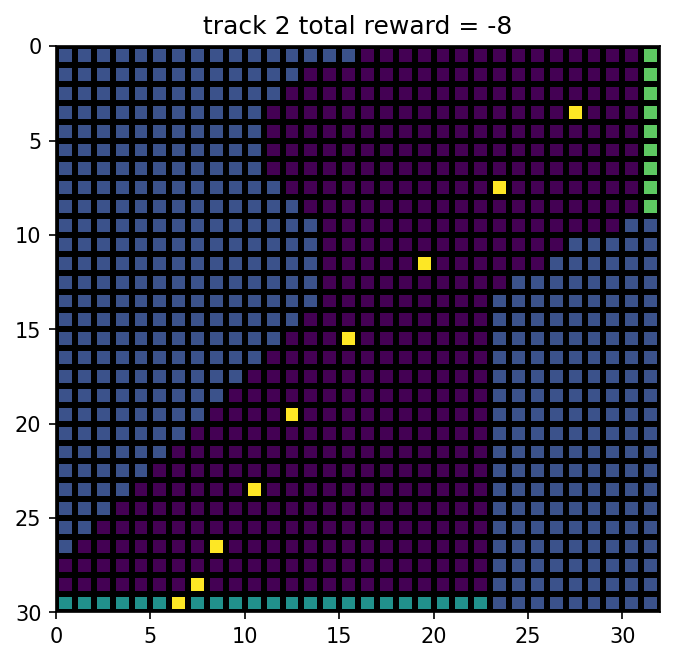

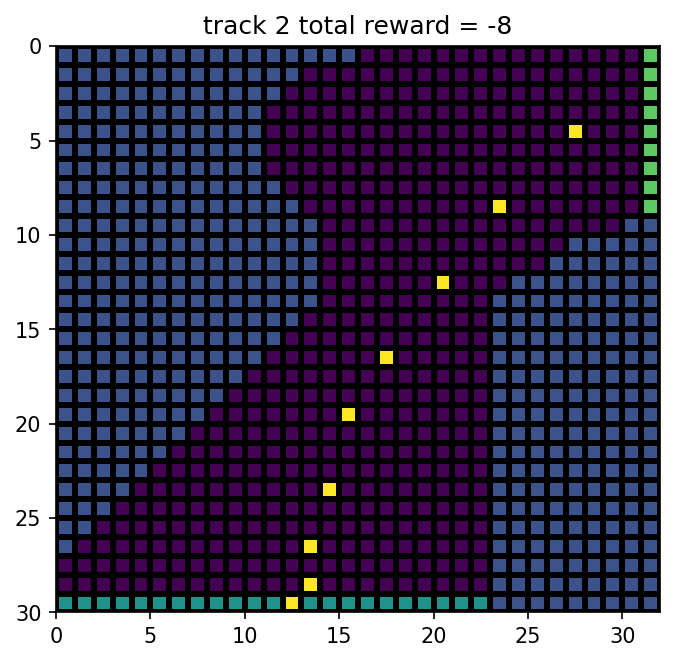

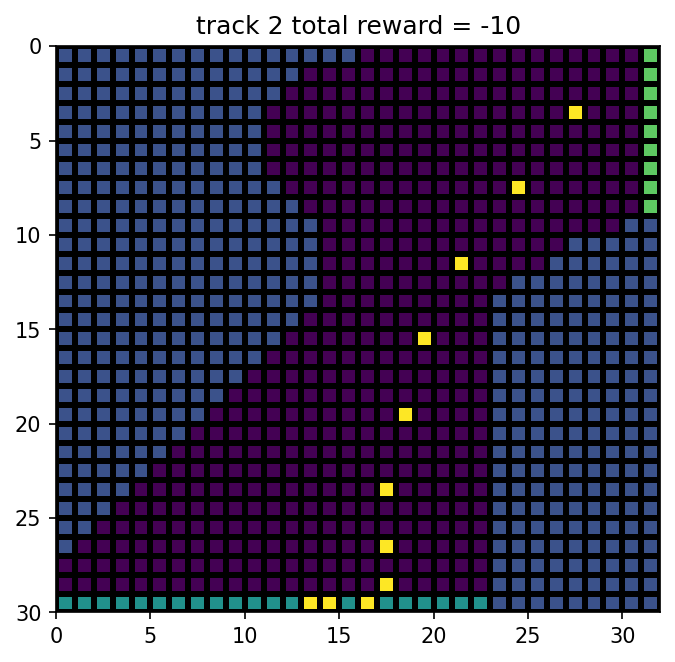

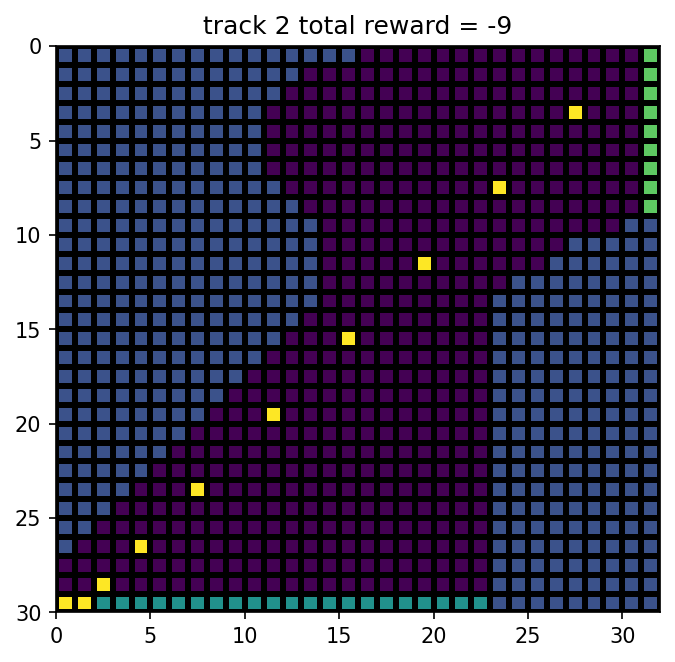

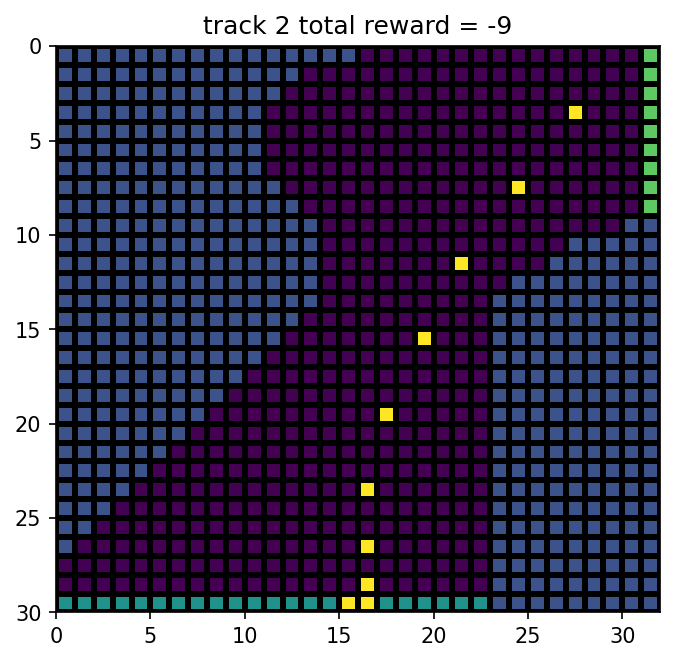

In [18]:
for ind, ep in enumerate(episodes):
    
    track2.plot_track(ep,reward[ind])

# CHAPTER 6

## Exercise 6.9

Re-solve the windy gridworld assuming eight possible actions, including the diagonal moves, rather than the usual four. How much better can you do with the extra actions? Can you do even better by including a ninth action that causes no movement at all other than that caused by the wind?

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
# GLOBAL CONSTANTS, ACTIONS
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
DUR = 4
DUL = 5
DDR = 6
DDL = 7
NO_MOVE = 8

In [2]:

class WindyGridWorld:
    """
    A class to generate the windy gridworld enviroment requested in the exercise. 
    
    """
    
    def __init__(self, action_to_move, gridShape, stochastic = False):
        
        #self.track = track #track race matrix
        self._reset()  #reset env
        self.terminal_state = [3, 7]
        self.nA = len(action_to_move) #numver of actions
        self.nS = np.prod(gridShape)  #number of the states (position in the grd )
        self.stochastic = stochastic
        self.H, self.W = gridShape #height and width of the grid
        
        #values of the wind at each column
        self.wind = {
            0: 0,
            1: 0,
            2: 0,
            3: 1,
            4: 1,
            5: 1,
            6: 2,
            7: 2,
            8: 1,
            9: 0
        }
        
        self.action_to_move = action_to_move
        
    def reset(self): #resets the game-> new episode
        return self._reset()
    
    def step(self, action): 
        return self._step(action) #performs a step
    
    def _step(self, action): #performs a step in the episode given an anction
        
        action = self.action_to_move[action] #action
        i, j = self.position
        
        noise = 0 #noise
        if self.stochastic == True and self.wind[j]>0:
            noise =np.random.choice([0,1,-1])
        
        self.position = [max(min(i+action[0] - self.wind[j] + noise, self.H-1), 0), max(min(j+action[1], self.W-1), 0)]

        reward = -1 #reward
        done = False
        if self.position == self.terminal_state: #if terminal state done
            done = True
    
        return self._get_obs(), reward, done #gives state, reward and if the episode is over 
    
    
    
    
    def _get_obs(self): #get current state (position on the grid)
        return tuple(self.position)

    def _reset(self): #reset game
        self.position = [3, 0] #y,x position
        return self._get_obs() #returns the state    

In [3]:
def greedy_policy(Q):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
    
    Returns:
        A function that takes the observation as an argument and returns
        the action with max Q.
    
    """
    
    def policy_greedy(observation):
        argmax = np.argmax(Q[observation]) #max action value index
       
        return argmax
    return policy_greedy

In [4]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    
    def policy_e_greedy(observation):
        argmax = np.argmax(Q[observation]) #max action value index
        probs = epsilon/nA*np.ones(nA)
        probs[argmax] = 1 - epsilon + epsilon/nA
        return probs
    return policy_e_greedy

In [5]:
from collections import defaultdict

def sarsa(env, num_episodes, gamma=1.0, alpha=0.5, epsilon=0.1, Q=None):
    """
    SARSA algorithm: On-policy TD control. Finds the optimal epsilon-greedy policy.
    
    Args:
        env: environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Probability to sample a random action. Float between 0 and 1.
        Q: hot-start the algorithm with a Q value function (optional)
    
    Returns:
        A tuple (Q, time_step).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        time_step a list with the total time steps of an episode.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    if Q is None:
        Q = defaultdict(lambda: np.zeros(env.nA)) #for each state 4 actions u d r l
    
    # Keeps track of useful statistics
    time_steps = []
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.nA)
    ts = 0 #total time step
    
    for i in tqdm(range(num_episodes)):
        #policy = make_epsilon_greedy_policy(Q, epsilon, env.nA)
        #SARSA
        S = env.reset()  #starting state
        A_probs = policy(S) 
        A = np.argmax(np.random.multinomial(1, A_probs)) #choose action from the prob dist of available actions
    
        done = False
        while(done == False):
            ts=ts+1
            
            
            S_prime, reward, done = env.step(A)
            A_p_probs = policy(S_prime) 
            A_prime = np.argmax(np.random.multinomial(1, A_p_probs)) #new action A'
            Q[S][A] = Q[S][A] + alpha * (reward + gamma * Q[S_prime][A_prime] - Q[S][A])
            S = S_prime
            A = A_prime
            
            
        time_steps.append(ts)   
    return Q, time_steps



In [6]:
def generate_episode(Q, env):
    #generate episode
    policy = greedy_policy(Q)
    S = env.reset()  #starting state
    A = policy(S) #choose action from the prob dist of available actions
    total_reward = 0 
    done = False
    episode = []
    episode.append(S)
    while(done == False):
       
        S_prime, reward, done = env.step(A)
        A_prime = policy(S_prime) #new action A'
        S = S_prime
        A = A_prime
        #print(A)
        #print(S)
        episode.append(S)
        total_reward = total_reward + reward 
    
    return episode, total_reward

### 4 MOVE CASE

In [7]:
gridShape = (7, 10)
action_to_move = {
            UP: [-1, 0],
            RIGHT: [0, 1],
            DOWN: [1, 0],
            LEFT: [0, -1]
        }

In [8]:
env4 = WindyGridWorld(action_to_move, gridShape)

In [9]:
Q, time_steps = sarsa(env4, 1000)


100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 402.45it/s]


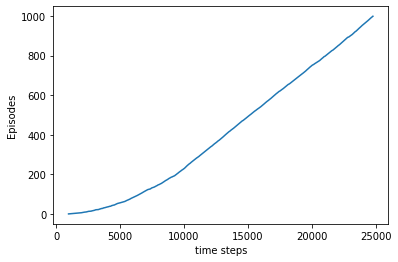

In [10]:
plt.plot(time_steps,np.arange(0,len(time_steps)))
plt.xlabel('time steps')
plt.ylabel('Episodes')
plt.show()

In [11]:
episode, reward = generate_episode(Q, env4)

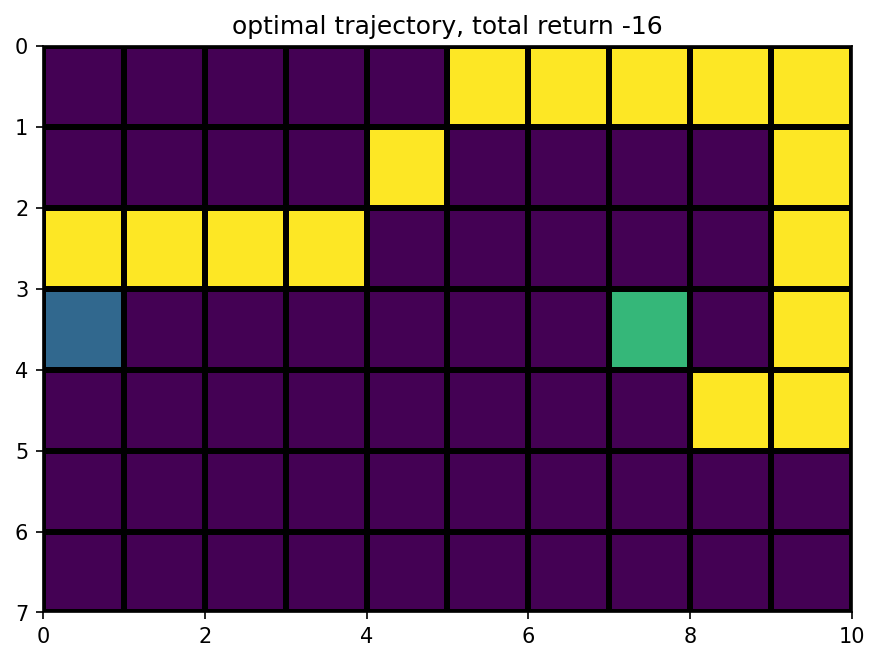

In [12]:
grid = np.zeros(gridShape) 
            
grid[(3,0)] = 1
grid[(3,7)] = 2
for coord in episode[1:-1]:
    grid[coord] = 3 #car value
plt.figure(figsize=(10, 5), dpi=150)
plt.pcolormesh(grid, edgecolors='k', linewidth=2)
ax = plt.gca()
ax.set_aspect('equal')
ax.invert_yaxis()
plt.title("optimal trajectory, total return " + str(reward))
plt.show()

### 8 MOVE CASE

In [13]:
gridShape = (7, 10)
action_to_move = {
            UP: [-1, 0],
            RIGHT: [0, 1],
            DOWN: [1, 0],
            LEFT: [0, -1],
            DUR: [-1, 1],
            DUL: [-1, -1],
            DDR: [1, 1],
            DDL: [1, -1]
        }

In [14]:
env8 = WindyGridWorld(action_to_move, gridShape)

In [15]:
Q, time_steps = sarsa(env8, 1000)


100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 513.24it/s]


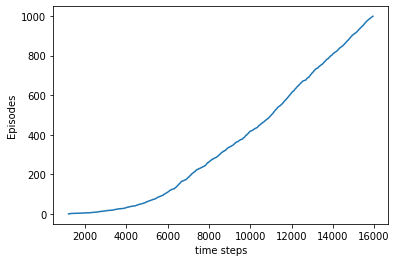

In [16]:
plt.plot(time_steps,np.arange(0,len(time_steps)))
plt.xlabel('time steps')
plt.ylabel('Episodes')
plt.show()

In [17]:
episode, reward = generate_episode(Q, env8)

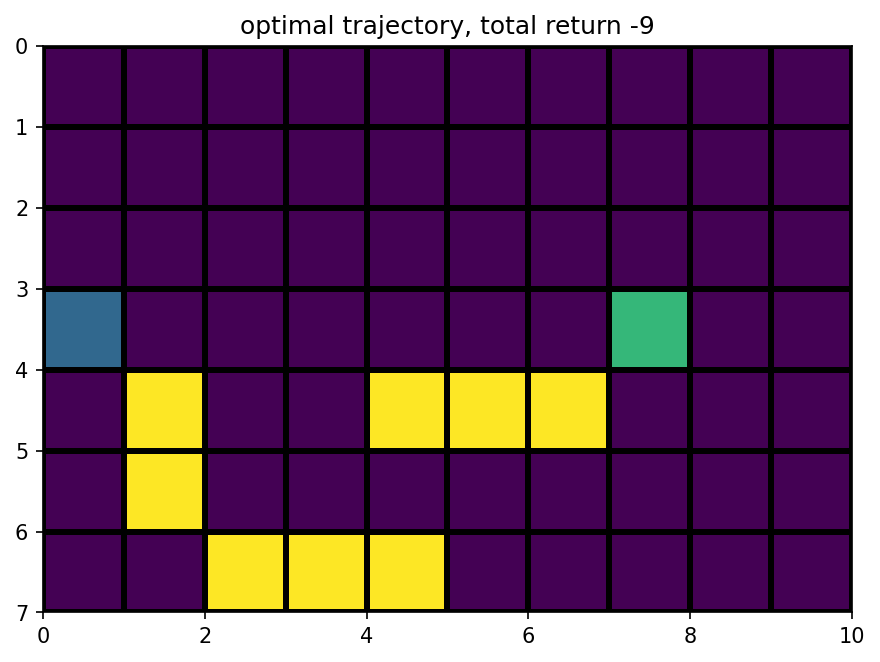

In [18]:
grid = np.zeros(gridShape) 
            
grid[(3,0)] = 1
grid[(3,7)] = 2
for coord in episode[1:-1]:
    grid[coord] = 3 #car value
plt.figure(figsize=(10, 5), dpi=150)
plt.pcolormesh(grid, edgecolors='k', linewidth=2)
ax = plt.gca()
ax.set_aspect('equal')
ax.invert_yaxis()
plt.title("optimal trajectory, total return " + str(reward))
plt.show()

### 9 MOVE CASE

In [19]:
gridShape = (7, 10)
action_to_move = {
            UP: [-1, 0],
            RIGHT: [0, 1],
            DOWN: [1, 0],
            LEFT: [0, -1],
            DUR: [-1, 1],
            DUL: [-1, -1],
            DDR: [1, 1],
            DDL: [1, -1],
            NO_MOVE: [0, 0]
        }

In [20]:
env9 = WindyGridWorld(action_to_move, gridShape)

In [21]:
Q, time_steps = sarsa(env9, 1000)


100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 553.11it/s]


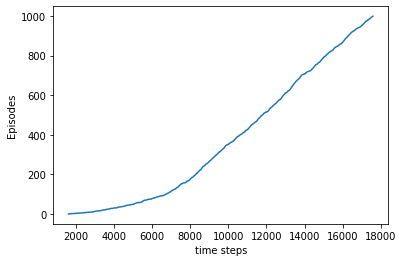

In [22]:
plt.plot(time_steps,np.arange(0,len(time_steps)))
plt.xlabel('time steps')
plt.ylabel('Episodes')
plt.show()

In [23]:
episode, reward = generate_episode(Q, env9)

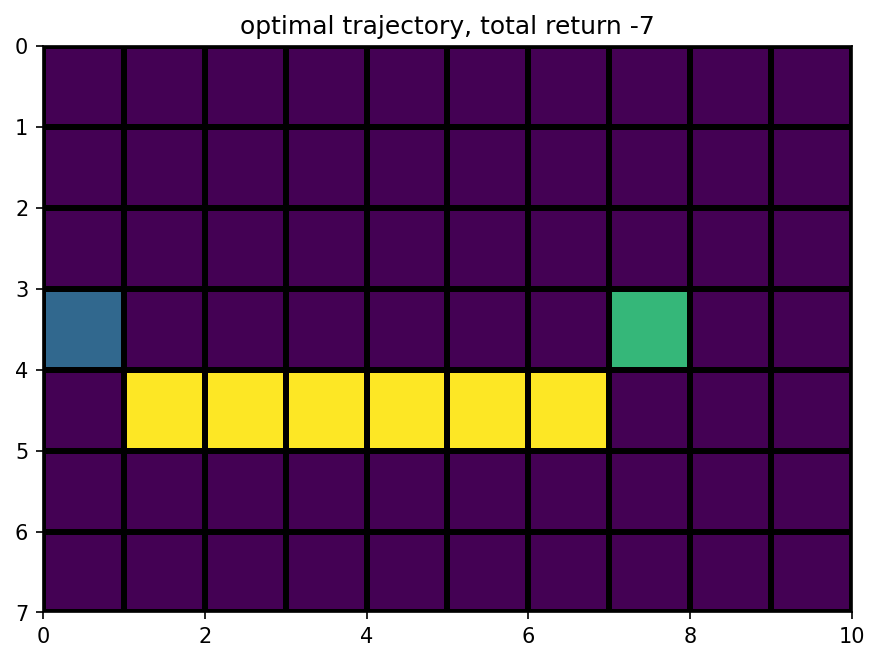

In [24]:
grid = np.zeros(gridShape) 
            
grid[(3,0)] = 1
grid[(3,7)] = 2
for coord in episode[1:-1]:
    grid[coord] = 3 #car value
plt.figure(figsize=(10, 5), dpi=150)
plt.pcolormesh(grid, edgecolors='k', linewidth=2)
ax = plt.gca()
ax.set_aspect('equal')
ax.invert_yaxis()
plt.title("optimal trajectory, total return " + str(reward))
plt.show()

## Exercise 6.10

Re-solve the windy gridworld task with King’s moves, assuming that the e↵ect of the wind, if there is any, is stochastic, sometimes varying by 1 from the mean values given for each column. That is, a third of the time you move exactly according to these values, as in the previous exercise, but also a third of the time you move one cell above that, and another third of the time you move one cell below that. For example, if you are one cell to the right of the goal and you move left, then one-third of the time you move one cell above the goal, one-third of the time you move two cells above the goal, and one-third of the time you move to the goal.

Note: same code as in exercise 6.9.

### Stochastic steps

In [25]:
gridShape = (7, 10)
action_to_move = {
            UP: [-1, 0],
            RIGHT: [0, 1],
            DOWN: [1, 0],
            LEFT: [0, -1],
            DUR: [-1, 1],
            DUL: [-1, -1],
            DDR: [1, 1],
            DDL: [1, -1],
            NO_MOVE: [0, 0]
        }

In [26]:
env9s = WindyGridWorld(action_to_move, gridShape, True)

In [27]:
Q, time_steps = sarsa(env9s, 1000)


100%|██████████████████████████████████████| 1000/1000 [00:06<00:00, 163.23it/s]


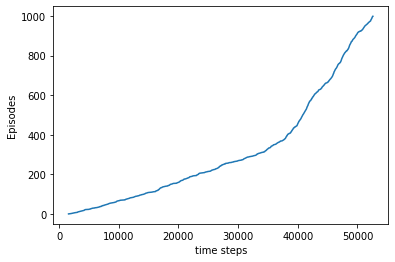

In [28]:
plt.plot(time_steps,np.arange(0,len(time_steps)))
plt.xlabel('time steps')
plt.ylabel('Episodes')
plt.show()

In [29]:
episode, reward = generate_episode(Q, env9s)

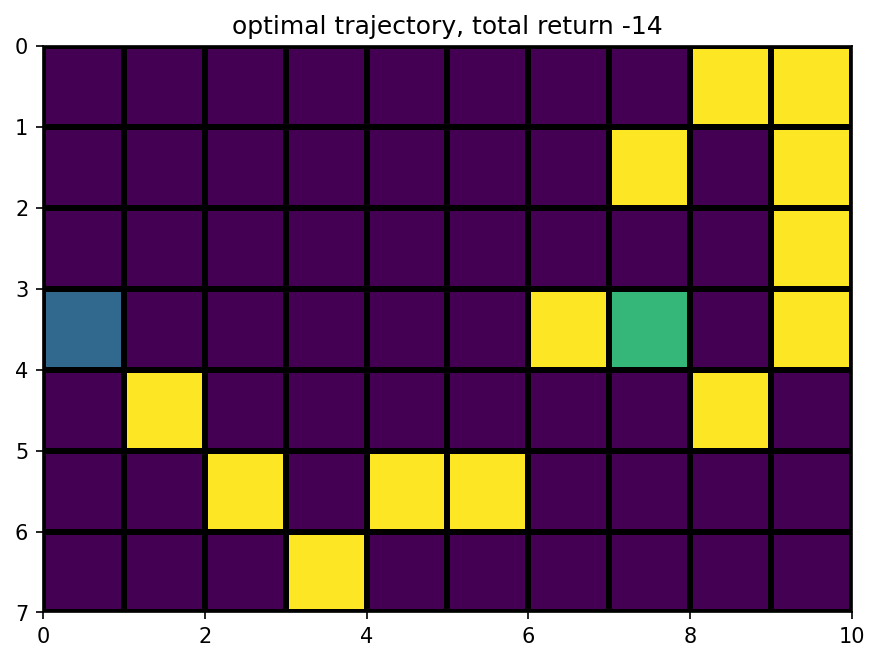

In [30]:
grid = np.zeros(gridShape) 
            
grid[(3,0)] = 1
grid[(3,7)] = 2
for coord in episode[1:-1]:
    grid[coord] = 3 #car value
plt.figure(figsize=(10, 5), dpi=150)
plt.pcolormesh(grid, edgecolors='k', linewidth=2)
ax = plt.gca()
ax.set_aspect('equal')
ax.invert_yaxis()
plt.title("optimal trajectory, total return " + str(reward))
plt.show()

# CHAPTER 7

## Exercise 7.2

With an $n$-step method, the value estimates do change from step to step, so an algorithm that used the sum of TD errors (see previous exercise) in place of the error in (7.2) would actually be a slightly different algorithm. Would it be a better algorithm or a worse one? Devise and program a small experiment to answer this question empirically.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:

class RandomWalk:
    """
    A class to generate the Random walk environment.

    """

    def __init__(self, nS):
        self.nS = nS
        self.endStates = [0, nS+1]
        self._reset()  #reset env
        

    def reset(self): #resets the game-> new episode
        return self._reset()

    def step(self, state):
        return self._step(state) #performs a step

    def _step(self, state): #performs a step in the episode given an action

        
        
        if np.random.rand()<0.5:
            self.state = self.state + 1
    
        else:
            self.state = self.state - 1
         
        
        done = False
        reward = 0 
        if self.state == self.endStates[0]:
            done = True
            reward = -1
        if self.state == self.endStates[1]:
            reward = 1
            done = True

        return self._get_obs(), reward, done #gives state, reward and if the episode is over




    def _get_obs(self): #get current state
        return self.state

    def _reset(self): #reset game
        self.state = int(np.ceil(self.nS/2)) # init state
        return self._get_obs() #returns the state

In [3]:
def n_step_TD(env, n, num_episodes, alpha, gamma):
    """
    n step TD algorithm for prediction,
    
    Args:
        env: Enviroment.
        n: steps
        num_episodes: Number of episodes to sample.
        alpha: step size.
        gamma: Gamma discount factor.
        
    
    Returns:
       root mean squared error of n td and n td with td sums.
        
    
    """
   
    V = np.zeros(env.nS+2)
    V_dt = np.zeros(env.nS+2)
    rms = 0
    rms_dt = 0
    for i in range(num_episodes):
        states = []
        rewards = [0]
        

    #generate episode
        state = env.reset() #init state
        states.append(state)
        T = np.inf
        t=0
        while True:
            
          
            if t<T:
                state, reward, done = env.step(state) #next state
                states.append(state)
                rewards.append(reward)
            
                if done == True:
                    T = t + 1
          
            tau = t - n + 1
            if tau >=0:
                G = 0
                dt = 0
                for i in range(tau+1, min(tau+n+1, T+1)):
                    G = G + (gamma)**(i-tau-1)*rewards[i]
                    dt = dt +(gamma)**(i-tau-1)*(rewards[i] + gamma*V_dt[states[i]]-V_dt[states[i-1]]) #dt sum
                if tau + n < T:
                    G = G + (gamma**n)* V[states[tau+n]]
                V[states[tau]] = V[states[tau]] + alpha *(G - V[states[tau]])
                V_dt[states[tau]] = V_dt[states[tau]] + alpha * (dt-V_dt[states[tau]])

          
            if tau == T - 1:
                break


            t=t+1
        V[0]=V[-1]=V_dt[0]=V_dt[-1]=0
    
        rms = rms + np.sqrt(np.sum((V_TRUE-V)**2)/env.nS)
        rms_dt = rms_dt + np.sqrt(np.sum((V_TRUE-V_dt)**2)/env.nS)
    
    return rms/num_episodes, rms_dt/num_episodes

In [4]:
#true value function
V_TRUE = np.arange(-20, 22, 2) / 20.0
V_TRUE[0]=V_TRUE[-1]=0

In [5]:
ns = np.power(2, np.arange(0, 10))
alphas = np.arange(0, 1.1, 0.1)
episodes = 10
runs = 100
gamma = 1

In [6]:
states = 19
env = RandomWalk(states)

In [7]:
errors = np.zeros((len(ns), len(alphas)))
errors_dt = np.zeros((len(ns), len(alphas)))
for run in tqdm(range(runs)):
    for ind1, n in enumerate(ns):
        for ind2, alpha in enumerate(alphas):
            rms, rms_td = n_step_TD(env, n, episodes, alpha, gamma)
            errors[ind1][ind2]=errors[ind1][ind2] + rms
            errors_dt[ind1][ind2]=errors_dt[ind1][ind2] + rms_td

errors = errors/runs
errors_dt = errors_dt/runs

100%|███████████████████████████████████████| 100/100 [1:29:43<00:00, 53.83s/it]


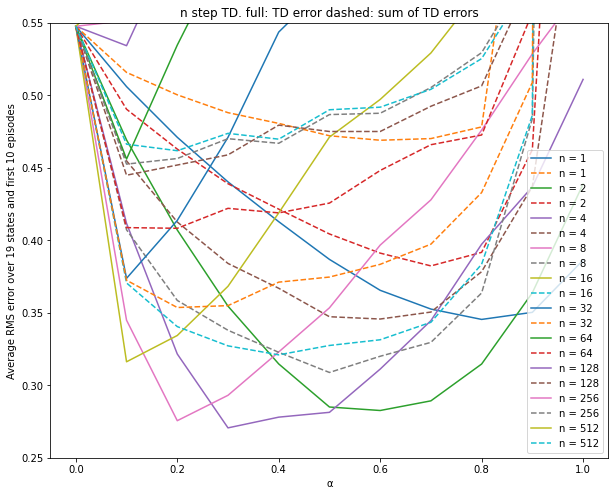

In [8]:
#plot
plt.figure(figsize=(10, 8))
for i in range(0, len(ns)):
    plt.plot(alphas, errors[i, :], label='n = %d' % (ns[i]))
    plt.plot(alphas, errors_dt[i, :], linestyle='dashed',label='n = %d' % (ns[i]))
    plt.xlabel('α')
    plt.ylabel('Average RMS error over 19 states and first 10 episodes')
    plt.ylim([0.25, 0.55])
    plt.title("n step TD. full: TD error dashed: sum of TD errors")
    plt.legend()

## Exercise 7.10

Devise a small off-policy prediction problem and use it to show that the off-policy learning algorithm using (7.13) and (7.2) is more data efficient than the simpler algorithm using (7.1) and (7.9). We use Blackjack example 5.1.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import gym
from gym import spaces
from gym.utils import seeding

def cmp(a, b):
    return int((a > b)) - int((a < b))

# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def draw_card(np_random): #draws a random card from the deck
    return np_random.choice(deck)


def draw_hand(np_random):  #inital cards to start the game obrained in ranfom
    return [draw_card(np_random), draw_card(np_random)]


def usable_ace(hand):  # Does this hand have a usable ace? checks if it has a usable ace returns true or false
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
            return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]


class BlackjackEnv(gym.Env):
    """Simple blackjack environment
    Blackjack is a card game where the goal is to obtain cards that sum to as
    near as possible to 21 without going over.  They're playing against a fixed
    dealer.
    Face cards (Jack, Queen, King) have point value 10.
    Aces can either count as 11 or 1, and it's called 'usable' at 11.
    This game is placed with an infinite deck (or with replacement).
    The game starts with each (player and dealer) having one face up and one
    face down card.
    The player can request additional cards (hit=1) until they decide to stop
    (stick=0) or exceed 21 (bust).
    After the player sticks, the dealer reveals their facedown card, and draws
    until their sum is 17 or greater.  If the dealer goes bust the player wins.
    If neither player nor dealer busts, the outcome (win, lose, draw) is
    decided by whose sum is closer to 21.  The reward for winning is +1,
    drawing is 0, and losing is -1.
    The observation of a 3-tuple of: the players current sum,
    the dealer's one showing card (1-10 where 1 is ace),
    and whether or not the player holds a usable ace (0 or 1).
    This environment corresponds to the version of the blackjack problem
    described in Example 5.1 in Reinforcement Learning: An Introduction
    by Sutton and Barto (1998).
    https://webdocs.cs.ualberta.ca/~sutton/book/the-book.html
    """
    def __init__(self, natural=False):
        self.action_space = spaces.Discrete(2) #hit or stick
        #states
        self.observation_space = spaces.Tuple((
            spaces.Discrete(32), #player current sum above 11
            spaces.Discrete(11), #dealer showing card
            spaces.Discrete(2))) #usable ace
        self._seed()

        # Flag to payout 1.5 on a "natural" blackjack win, like casino rules
        # Ref: http://www.bicyclecards.com/how-to-play/blackjack/
        self.natural = natural
        # Start the first game
        self._reset()        # Number of actions
        self.nA = 2

    def reset(self): #resets the game-> new episode
        return self._reset()

    def step(self, action):
        return self._step(action) #performs a step

    def _seed(self, seed=None): #seed for random numbers 
        self.np_random, seed = seeding.np_random(seed) #gives a function (random ) and  seed
        return [seed]

    def _step(self, action): #performs a step in the episode given an anction
        assert self.action_space.contains(action) #choose action 0 or 1 otherwise error
        if action:  # hit: add a card to players hand and return
            self.player.append(draw_card(self.np_random)) #list that holds players cards
            if is_bust(self.player): #check if player lost
                done = True #then episode done and reward is -1
                reward = -1
            else:
                done = False #else episode is not done and reward zero
                reward = 0
        else:  # stick: play out the dealers hand, and score
            done = True #episode is over
            while sum_hand(self.dealer) < 17: # if dealer < 17 draws another one, do this until dealer goes >17
                self.dealer.append(draw_card(self.np_random)) #append the card to the dealers cards
            reward = cmp(score(self.player), score(self.dealer)) #calculate the reward, if player won(1), lost(-1) or draw(0)
            if self.natural and is_natural(self.player) and reward == 1: #if player has the natural hand and won the dealer 
                reward = 1.5 
        return self._get_obs(), reward, done, {} #gives state, reward, if the episode is over and info (an empty dict)

    def _get_obs(self): #get current state sum of player cards, one card of the dealer and if player had usable ace
        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player))

    def _reset(self): #reset game
        self.dealer = draw_hand(self.np_random) #draw 2 cards for player and dealer
        self.player = draw_hand(self.np_random)

        # Auto-draw another card if the score is less than 12
        while sum_hand(self.player) < 12:
            self.player.append(draw_card(self.np_random))

        return self._get_obs() #returns the state

In [2]:
def target_policy(observation):
    """
    A policy that sticks if the player score is >= 20 and hits otherwise.
    """
    
    return int(observation[0] < 20)

In [3]:
def target_policy_prob(observation, action):
    """
    returns target policies probs (deterministic).
    """
    act =  int(observation[0] < 20)
    return (action == act)*1

In [4]:
def behavior_policy(observation):
    """
    behavior policy (equal random)
    """
    return np.random.choice([0,1]), 0.5

In [5]:
from collections import defaultdict

def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float) #empty dict
    
    
    
    for i in tqdm(range(num_episodes)):
        
        #Generate and episode
        init_s = env.reset() #init state
        action = policy(init_s) #action
        observation, reward, done, info = env.step(action)
        episode = [(init_s, reward)] #S0,R1
        
        while(done == False): #if episode not done generate the rest S,R pairs
            last_obs = observation
            action = policy(observation) 
            observation, reward, done, info = env.step(action)
            episode.append((last_obs, reward))
    
    
        G = 0 #init return to 0
        #calculate the reward G for each state encountered
        for state, R in reversed(episode):
            G = discount_factor*G + R
            
            returns_sum[state] = returns_sum[state] + G
            returns_count[state] = returns_count[state] + 1
            V[state] = returns_sum[state]/returns_count[state]
    
    return V

In [6]:
from collections import defaultdict

def off_policy_n_step_TD(env, n, num_episodes, alpha, gamma, state_eval):
    """
    off-policy n step TD
    
    Args:
        env: Enviroment.
        n: steps.
        num_episodes: Number of episodes to sample.
        alpha: step size.
        gamma: Gamma discount factor.
        state_eval: state for tracking the value of that state.
    
    Returns:
        V: importance sampling value.
        V2: control variate value.
        V_val: importance sampling value at state_eval.
        V2_val: control variate value at state_eval.
        
    
    """
   
    V = defaultdict(float) #empty dict, for importance sampling
    V2 = defaultdict(float) #for control variate
    V_val = []
    V2_val = []
    
    for i in tqdm(range(num_episodes)):
        states = []
        rewards = [0]
        actions = []
        rho_t=[]
    #generate episode
        state = env.reset() #init state
        states.append(state)
        T = np.inf
        t=0
        while True:
            
          
            if t<T:
                action, action_prob = behavior_policy(state) #action
                prob = target_policy_prob(state, action)
                rho_t.append(prob/action_prob) #rho
                state, reward, done, _ = env.step(action) #next state observation, reward, done, info
                states.append(state)
                rewards.append(reward)
                if done == True:
                    T = t + 1
          
            tau = t - n + 1
            if tau >=0:
                G = 0
                rho=1
                G2=0 # c
                for i in range(tau, min(tau+n, T)):
                   
                    rho = rho * rho_t[i]
                if tau+n >= T:
                    G2 =0
                else:
                    G2 =  V2[states[tau+n]]
                for i in reversed(range(tau, min(tau+n, T))):
                    
                    G2 = rho_t[i] * (rewards[i+1]+gamma * G2) + (1-rho_t[i]) * V2[states[i]] #control variate return
                        
                
                for i in range(tau+1, min(tau+n+1, T+1)):
                    G = G + (gamma)**(i-tau-1)*rewards[i]
                 
                if tau + n < T:
                    G = G + (gamma**n)* V[states[tau+n]] #importance sampling return
                    
                V[states[tau]] = V[states[tau]] + alpha * rho *(G - V[states[tau]]) #importance sampling update
                V2[states[tau]] = V2[states[tau]] + alpha * (G2 - V2[states[tau]]) #control variate update

            
            if tau == T - 1:
                break
            
            t=t+1
       
        V_val.append(V[state_eval])
        V2_val.append(V2[state_eval])

    return V, V2, V_val, V2_val

### First we run MC prediction algorithm to find the value function

In [7]:
env = BlackjackEnv()
state_eval = (16, 4, False)
num_episodes= 500000

In [8]:
V_MC = mc_prediction(target_policy, env, num_episodes)


100%|█████████████████████████████████| 500000/500000 [01:42<00:00, 4893.74it/s]


In [9]:
V_MC_val = V_MC[state_eval]
print(V_MC_val)

-0.6646496193636541


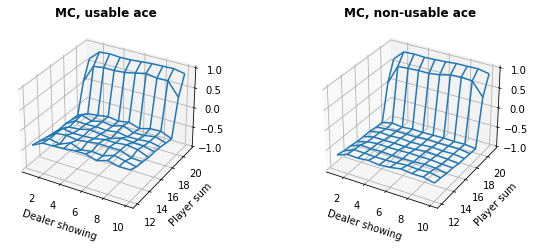

In [10]:
#plotting
from mpl_toolkits import mplot3d



zAce500k = np.zeros((10,10))
zNoAce500k = np.zeros((10,10))


for (x,y,ace) in V_MC:
    
    if ace==True:
        zAce500k[x-12][y-1] = V_MC[(x,y,ace)]
    else: 
        zNoAce500k[x-12][y-1] = V_MC[(x,y,ace)]
        





zlist = [zAce500k, zNoAce500k]

X, Y = np.meshgrid(np.arange(1,11), np.arange(12,22))
titles = ["MC, usable ace", "MC, non-usable ace"]


plot_number = 0 

plt.figure(figsize=(10, 8))
for z in zlist: 
        plot_number += 1
        ax = plt.subplot(int(str(22) + str(plot_number)),projection='3d')
        ax.set_title(titles[plot_number-1],fontsize=12,fontweight = "bold");
        ax.set_ylabel('Player sum')
        ax.set_xlabel('Dealer showing')
        ax.set_zlim3d(-1, 1)
        ax.plot_wireframe(X, Y, z)
        #im = ax.plot_surface(X, Y, z)
        
plt.show()        

### Now we run off-policy

In [11]:
n = 3 
alpha = 0.001
gamma = 1

In [12]:
V_IM, V_CV, V_IM_val, V_CV_val = off_policy_n_step_TD(env, n, num_episodes, alpha, gamma, state_eval)

100%|█████████████████████████████████| 500000/500000 [02:20<00:00, 3554.82it/s]


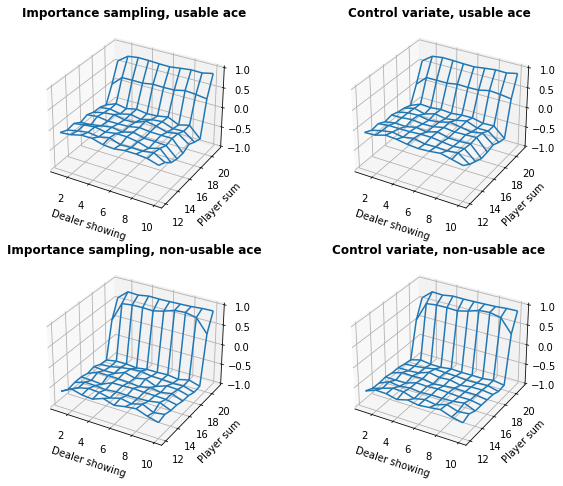

In [13]:
#plotting
from mpl_toolkits import mplot3d



zAce_V_IM = np.zeros((10,10))
zNoAce_V_IM = np.zeros((10,10))
zAce_V_CV = np.zeros((10,10))
zNoAce_V_CV = np.zeros((10,10))

for (x,y,ace) in V_IM:
    
    if ace==True:
        zAce_V_IM[x-12][y-1] = V_IM[(x,y,ace)]
    else: 
        zNoAce_V_IM[x-12][y-1] = V_IM[(x,y,ace)]
        



for (x,y,ace) in V_CV:
    
    if ace==True:
        zAce_V_CV[x-12][y-1] = V_CV[(x,y,ace)]
    else:
        zNoAce_V_CV[x-12][y-1] = V_CV[(x,y,ace)]
 

zlist = [zAce_V_IM, zAce_V_CV, zNoAce_V_IM, zNoAce_V_CV]

X, Y = np.meshgrid(np.arange(1,11), np.arange(12,22))
titles = ["Importance sampling, usable ace","Control variate, usable ace",
         "Importance sampling, non-usable ace","Control variate, non-usable ace"]

plt.figure(figsize=(10, 8))
plot_number = 0 
for z in zlist: 
        plot_number += 1
        ax = plt.subplot(int(str(22) + str(plot_number)),projection='3d')
        ax.set_title(titles[plot_number-1],fontsize=12,fontweight = "bold");
        ax.set_ylabel('Player sum')
        ax.set_xlabel('Dealer showing')
        ax.set_zlim3d(-1, 1)
        ax.plot_wireframe(X, Y, z)
        #im = ax.plot_surface(X, Y, z)
        
plt.show()        

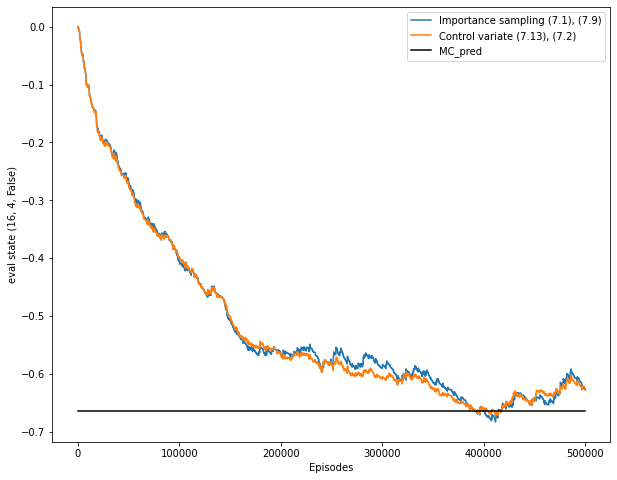

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(V_IM_val, label = 'Importance sampling (7.1), (7.9)')
plt.plot(V_CV_val, label = 'Control variate (7.13), (7.2)')
plt.plot([0, len(V_IM_val)], [V_MC_val, V_MC_val], '-', color='black', label='MC_pred')
plt.xlabel('Episodes')
plt.ylabel('eval state '+ str(state_eval))
plt.legend()
plt.show()

Maybe I made mistakes on the indicies (function off-policy) for the control variate. The experiments result depend on the value of α. Maybe expoloring more hyperarameters will be more clear. It is not clear that (7.13) and (7.2) is more data efficient than the simpler algorithm using (7.1) and (7.9).

# CHAPTER 8

## Exercise 8.4

The exploration bonus described above actually changes the estimated values of states and actions. Is this necessary? Suppose the bonus $\kappa \sqrt{\tau}$ was used not in updates, but solely in action selection. That is, suppose the action selected was always that for which $Q(S_t, a) +  \kappa \sqrt{\tau}$ was maximal.  Carry out a gridworld experiment that tests and illustrates the strengths and weaknesses of this
alternate approach.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import random

# GLOBAL CONSTANTS, ACTIONS
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
K = 1e-3
ACTIONS = [UP, DOWN, RIGHT, LEFT]
TIME_CHANGE = 3000 #time that maze changes

In [2]:
class grid:
    """
    A class to generate the Shortcut Maze of the exercise.
    Also includes ploting the grid.



    """

    def __init__(self):
        self.shape = (6,9)
        self.grid1 = np.zeros(self.shape)
        self.grid1[3, 1:] = 1
        self.grid2 = np.zeros(self.shape)
        self.grid2[3, 1:-1] = 1
    def get_maze1(self):

        return self.grid1
    def get_maze2(self):
        return self.grid2

    def plot_grid(self,bool=False, string = " "):
        if bool==False:
            grid = self.grid1
        else:
            grid = self.grid2
        plt.figure(figsize=(10, 5), dpi=150)
        plt.pcolormesh(grid, edgecolors='k', linewidth=2)
        plt.title(string)
        ax = plt.gca()
        ax.set_aspect('equal')
        ax.invert_yaxis()
        plt.show()


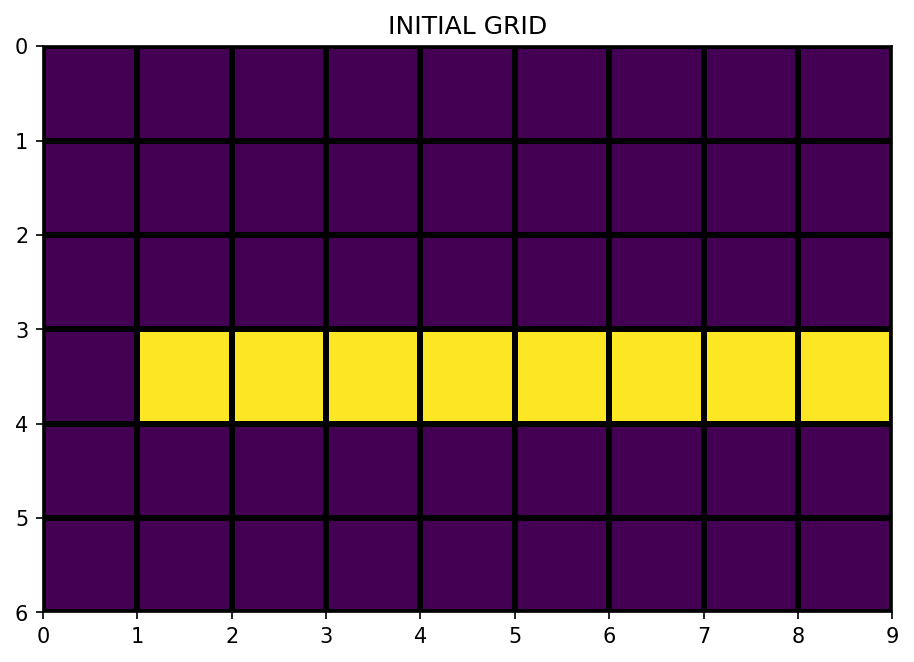

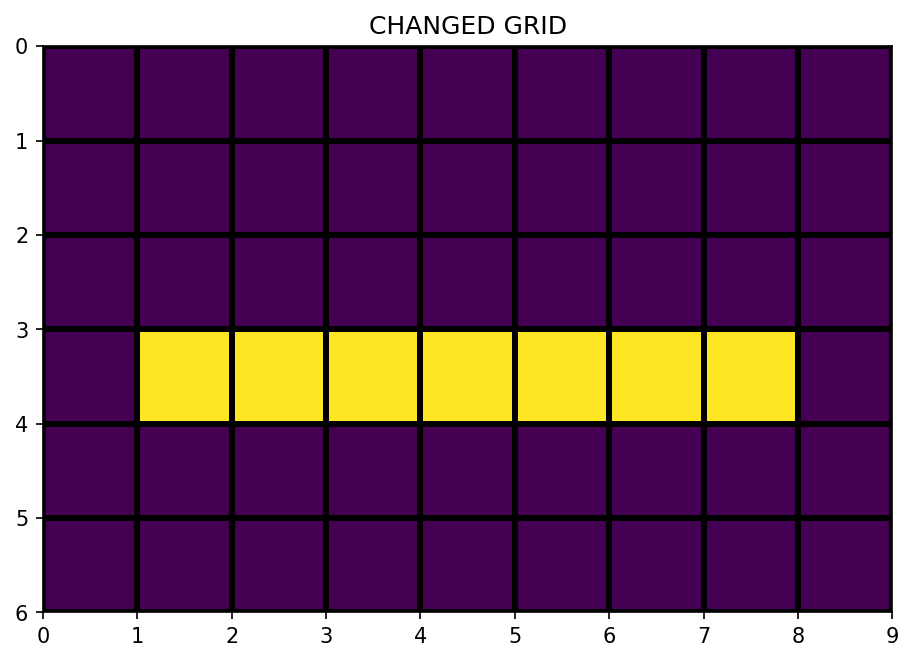

In [3]:
tt = grid()
tt.plot_grid(0, "INITIAL GRID")
tt.plot_grid(1, "CHANGED GRID")

In [4]:

class ShortcutMaze:
    """
    A class to generate the Shortcut Maze enviroment fig 8.5.

    """

    def __init__(self, grid):
        self._reset()  #reset env
        self.grid = grid
        self.maze = None
        self.terminal_state = [0, 8]
        self.nA = 4 #numver of actions u l d r
        self.nS = np.prod(grid.shape)  #number of the states (position in the grid )
        self.H, self.W = grid.shape #height and width of the grid
        self.timesteps = 0

        self.action_to_move = {
            UP: [-1, 0],
            RIGHT: [0, 1],
            DOWN: [1, 0],
            LEFT: [0, -1]
        }

    def reset(self): #resets the game-> new episode
        return self._reset()

    def step(self, action):
        return self._step(action) #performs a step

    def change_maze(self, maze):

        self.maze = maze
    def _step(self, action): #performs a step in the episode given an anction

        action = self.action_to_move[action] #action
        i, j = self.position


        ti, tj = [max(min(i+action[0], self.H-1), 0), max(min(j+action[1], self.W-1), 0)] #temp position

        if self.timesteps == 0:
            self.maze = self.grid.get_maze1()
        if self.timesteps == TIME_CHANGE:
            self.maze = self.grid.get_maze2()
        
        if self.maze[ti, tj]:
            reward = 0 #reward
            done = False

        elif [ti, tj] == self.terminal_state: #if terminal state done
            self.position = [ti, tj]
            done = True
            reward = 1

        else:
            self.position = [ti, tj]
            reward=0
            done=False

        self.timesteps += 1
        return self._get_obs(), reward, done #gives state, reward and if the episode is over




    def _get_obs(self): #get current state on the grid
        return tuple(self.position)

    def _reset(self): #reset game
        self.position = [5, 3] #x,y position
        return self._get_obs() #returns the state

In [5]:
def make_epsilon_greedy_policy(Q, epsilon, nA, Time=None):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.

    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
        Time: A dictionary that maps from state -> action-time values

    Returns:
        A function that takes the observation as an argument and returns
        the action according to the e greedy poicy.

    """

    def policy_e_greedy(observation):
        
        if Time == None:
      
            if np.random.rand() >= epsilon: 
                actions = []
                for ind, value in enumerate(Q[observation]):
                    if value == np.max(Q[observation]):
                        actions.append(ind)
                return np.random.choice(actions)
            else:
                return np.random.choice(ACTIONS)
        else:
            if np.random.rand() >= epsilon:

                actions = []
                for ind, value in enumerate(Q[observation] + K*np.sqrt(Time[observation])):
                    if value == np.max(Q[observation]+K*np.sqrt(Time[observation])):
                        actions.append(ind)
                return np.random.choice(actions)
            else:
                return np.random.choice(ACTIONS)


    return policy_e_greedy

In [6]:
from collections import defaultdict
from tqdm import tqdm

def Dyna(env, num_timesteps, gamma=0.95, alpha=1, epsilon=0.1, Dyna="DynaQ"):
    """
    DynaQ planning algorithm.

    Args:
        env: environment.
        num_timesteps: Number of timesteps to run for.
        gamma: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Probability to sample a random action. Float between 0 and 1.
        Dyna: choose between DynaQ, DynaQ+ and DynaQ+A algorithms

    Returns:
        A tuple (timesteps, cummulative reward).
    """

    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.nA)) #for each state 4 actions u d r l
    Model = defaultdict(dict)
    Time = defaultdict(lambda: np.zeros(env.nA))
    #INIT TIME dict
    for state in range(env.nS):
        Time[np.unravel_index(state, (6,9))]
    # Keeps track of useful statistics
    time_steps = []
    cum_reward = [0]
    # The policy we're following depending on the algorithm
    if Dyna == "DynaQ+A":
        policy = make_epsilon_greedy_policy(Q, epsilon, env.nA, Time)
    else:
        policy = make_epsilon_greedy_policy(Q, epsilon, env.nA)
    ts = 0 #total time step
    env.timesteps = 0
    #env.change_maze(maze.get_maze1())
    while ts < 6000:




        S = env.reset()  #a) starting state

        done = False
        while(done == False):
            
            A = policy(S) #b) choose action 

            

            S_prime, reward, done = env.step(A) # c)


            cum_reward.append(cum_reward[-1]+reward) #cummulative reward

            Q[S][A] = Q[S][A] + alpha * (reward + gamma * max(Q[S_prime]) - Q[S][A]) #d)

            if Dyna == "DynaQ+" or Dyna == "DynaQ+A":
                if (S,A) not in Model.keys():
                    for a in range(env.nA):
                        Model[(S,a)] = (S,0)
            Model[(S,A)] = (S_prime, reward) #e)

            for key in Time.keys(): #increase time for unobserved states
                Time[key] = Time[key] + 1

            Time[S][A] = 0 #set time to zero fot the given state action pair
            S = S_prime

            for j in range(50): #f) planning
                state, action = random.choice(list(Model.keys())) #choose random state, action
                next_state, reward_ = Model[(state, action)]
                
                if Dyna == "DynaQ+":
                    reward_ = reward_ + K * np.sqrt(Time[state][action]) #reward modification for DynaQ+


                Q[state][action] = Q[state][action] + alpha * (reward_ + gamma * max(Q[next_state]) - Q[state][action])
            
            ts=ts+1
            if ts == num_timesteps:
                break
        time_steps.append(ts)


    return time_steps, cum_reward



In [7]:
#run a number of experiments and take the average
import random
maze = grid()
env = ShortcutMaze(maze) #create env


avg_r = np.zeros(6001)
avg_r1 = np.zeros(6001)
avg_r2 = np.zeros(6001)
runs = 10#30
for run in tqdm(range(runs)):
    t_, r_ = Dyna(env,6000, Dyna = "DynaQ")
    avg_r = avg_r + r_
    t_, r_ = Dyna(env,6000,Dyna = "DynaQ+")
    avg_r1 = avg_r1 + r_
    t_, r_ = Dyna(env,6000,Dyna = "DynaQ+A")
    avg_r2 = avg_r2 + r_
avg_r = avg_r/runs
avg_r1 = avg_r1/runs
avg_r2 = avg_r2/runs

100%|███████████████████████████████████████████| 10/10 [03:30<00:00, 21.04s/it]


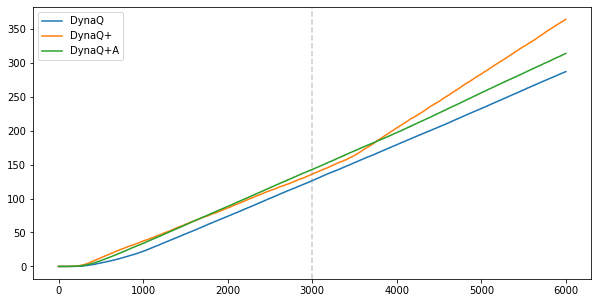

In [8]:
#plot results
plt.figure(figsize=(10, 5))
plt.plot(np.arange(t_[-1]+1),avg_r, label="DynaQ")
plt.plot(np.arange(t_[-1]+1),avg_r1, label="DynaQ+")
plt.plot(np.arange(t_[-1]+1),avg_r2, label="DynaQ+A")
plt.legend()
plt.axvline(x=3000, linestyle='--', color='grey', alpha=0.4)
plt.show()

## Exercise 8.9

Replicate the experiment whose results are shown in the lower part of Figure 8.8, then try the same experiment but with $b = 3$. Discuss the meaning of your results.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import random
ACTIONS = [0, 1] #Actions
PROB = 0.1 #Prob of termination
SAMPLE = 100 #Sample every 100 number of steps the value of start state
VALUE_EP = 1000 #number of episodes for the value of start state

In [2]:
class Environment:
    """
    A class to generate the enviroment of fig 8.8.

    """

    def __init__(self, nS, nA, b=1):
        self._reset()  #reset env
        self.nS = nS #number of states
        self.nA = nA #number of actions
        self.b = b #branching factor
        self.transitions = np.random.randint(nS, size=(nS, nA, b)) #transitions between states
        self.expected_rewards = np.random.randn(nS, nA, b) #expected rewards 
 
    def reset(self): #resets the game-> new episode
        return self._reset()

    def step(self, state, action):
        return self._step(state, action) #performs a step

    def _step(self, state, action): #performs a step in the episode given an action

        if np.random.rand()<PROB: #with prob 0.1 terminate
            done = True
            reward = 0
        else:
            done = False
            b = np.random.randint(self.b) 
            reward = np.random.normal(self.expected_rewards[state][action][b], 1)
            self.state = self.transitions[state][action][b] #new state

        return self._get_obs(), reward, done #gives state, reward and if the episode is over




    def _get_obs(self): #get current state
        return self.state

    def _reset(self): #reset game
        self.state = 0 # init state
        return self._get_obs() #returns the state

In [3]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.

    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.

    Returns:
        A function that takes the observation as an argument and returns
        the action according to the e greedy poicy.

    """

    def policy_e_greedy(observation):

        if np.random.rand() >= epsilon:

            actions = []
            for ind, value in enumerate(Q[observation]):
                if value == np.max(Q[observation]):
                    actions.append(ind)
            return np.random.choice(actions)
        else:
            return np.random.choice(ACTIONS)


    return policy_e_greedy

In [4]:
def greedy_policy(Q):
    """
    Creates an greedy policy based on a given Q-function.

    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)

    Returns:
        A function that takes the observation as an argument and returns
        the action with max Q.

    """

    def policy_greedy(observation):
        actions = []
        for ind, value in enumerate(Q[observation]):
            if value == np.max(Q[observation]):
                actions.append(ind)
        return np.random.choice(actions)
    return policy_greedy

In [5]:
from collections import defaultdict
from tqdm import tqdm

def on_policy(env, gamma=1., epsilon=0.1, max_steps = 200000):
    """
    On-policy sampling.

    Args:
        env: environment.
        gamma: Gamma discount factor.
        epsilon: Probability to sample a random action. Float between 0 and 1.
        max_steps: maximum number of steps.
        
    Returns:
        value of start state and number of steps.
    """

    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.nA)) #for each state 2 actions


    values = []
    steps = []
    policy = make_epsilon_greedy_policy(Q, epsilon, env.nA)
    state = env.reset()
    for ts in range(max_steps):
        action = policy(state)
        next_states = env.transitions[state][action]
        rewards = env.expected_rewards[state][action][0]
        q_av = 0
        for ns in next_states:
            q_av = q_av + np.max(Q[ns])
        q_av = q_av/len(next_states)
        Q[state][action] = (1-PROB) * (rewards + q_av)

        state, _ , done = env.step(state, action)

        if done == True:
            state = env.reset()

        if ts%SAMPLE == 0:
            value = value_start(env, VALUE_EP, Q)
            values.append(value)
            steps.append(ts)
    return values, steps


In [6]:

def uniform(env, gamma=1., epsilon=0.1, max_steps = 200000):
    """
    Uniform sampling.

    Args:
        env: environment.
        gamma: Gamma discount factor.
        epsilon: Probability to sample a random action. Float between 0 and 1.
        max_steps: maximum number of steps.
        
    Returns:
        value of start state and number of steps.
    """

    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.nA)) #for each state 2 actions
    Steps = 0
    values = []
    steps = []
    S = env.reset()
    while True:
        for state in range(env.nS):
            for action in ACTIONS:
              #A = policy(S)
                next_states = env.transitions[state][action]
                rewards = env.expected_rewards[state][action][0]
                q_av = 0
                for ns in next_states:
                    q_av = q_av + np.max(Q[ns])
                q_av = q_av/len(next_states)
                Q[state][action] = (1-PROB) * (rewards + q_av)


                if Steps%SAMPLE == 0:
                    value = value_start(env, VALUE_EP, Q)
                    values.append(value)
                    steps.append(Steps)
                Steps +=1
                if Steps >= max_steps:
                    return values, steps

In [7]:
def value_start(env, num_episodes, Q):
    

    policy = greedy_policy(Q)
    returns = []

    for i in range(num_episodes):
    #Generate and episode
        init_s = env.reset() #init state
        action = policy(init_s) #action
        next_state, reward, done = env.step(init_s, action) #next state, r, done
        total_reward = reward
        while(done == False): #if episode not done generate the rest S,R pairs
            previous_state = next_state
            action = policy(previous_state)
            next_state, reward, done = env.step(previous_state, action)
            total_reward = total_reward + reward
        returns.append(total_reward)
    value = np.mean(returns)
    return value

### 10000 states, b=1

In [8]:
num_states = 10000
b = 1
runs = 10

In [9]:
v_avg_on_b_1 = 0
for run in tqdm(range(runs)):

    env =  Environment(num_states,len(ACTIONS), b)
    v, steps =on_policy(env, gamma=1., epsilon=0.1, max_steps = 20000)
    v_avg_on_b_1 = v_avg_on_b_1 + np.array(v)

steps = np.array(steps)
v_avg_on_b_1 = v_avg_on_b_1/runs

100%|██████████████████████████████████████████| 10/10 [34:32<00:00, 207.21s/it]


In [10]:
v_avg_un_b_1 = 0
for run in tqdm(range(runs)):

    env =  Environment(num_states,len(ACTIONS), b)
    v, steps =uniform(env, gamma=1., epsilon=0.1, max_steps = 20000)
    v_avg_un_b_1 = v_avg_un_b_1 + np.array(v)

steps = np.array(steps)
v_avg_un_b_1 = v_avg_un_b_1/runs

100%|██████████████████████████████████████████| 10/10 [29:33<00:00, 177.34s/it]


### 10000 states, b=3

In [11]:
num_states = 10000
b = 3
runs = 10

In [12]:
v_avg_on_b_3 = 0
for run in tqdm(range(runs)):

    env =  Environment(num_states,len(ACTIONS), b)
    v, steps =on_policy(env, gamma=1., epsilon=0.1, max_steps = 20000)
    v_avg_on_b_3 = v_avg_on_b_3 + np.array(v)

steps = np.array(steps)
v_avg_on_b_3 = v_avg_on_b_3/runs

100%|██████████████████████████████████████████| 10/10 [34:54<00:00, 209.43s/it]


In [13]:
v_avg_un_b_3 = 0
for run in tqdm(range(runs)):

    env =  Environment(num_states,len(ACTIONS), b)
    v, steps =uniform(env, gamma=1., epsilon=0.1, max_steps = 20000)
    v_avg_un_b_3 = v_avg_un_b_3 + np.array(v)

steps = np.array(steps)
v_avg_un_b_3 = v_avg_un_b_3/runs

100%|██████████████████████████████████████████| 10/10 [36:57<00:00, 221.74s/it]


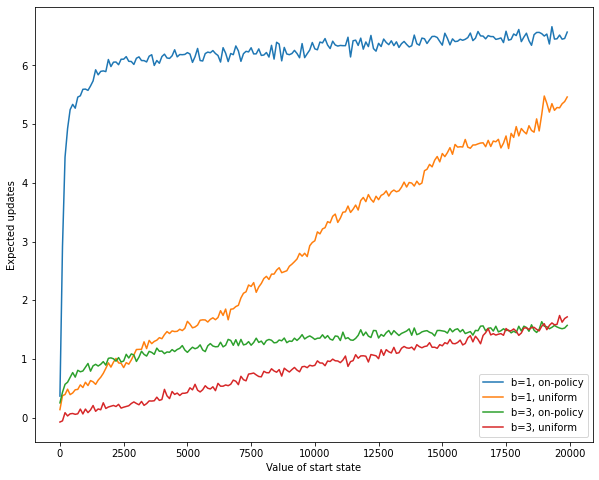

In [14]:
#plot results
plt.figure(figsize=(10, 8))
plt.plot(steps,v_avg_on_b_1, label = "b=1, on-policy")
plt.plot(steps,v_avg_un_b_1, label = "b=1, uniform")
plt.plot(steps,v_avg_on_b_3, label = "b=3, on-policy")
plt.plot(steps,v_avg_un_b_3, label = "b=3, uniform")
plt.ylabel('Expected updates')
plt.xlabel('Value of start state')
plt.legend()
plt.show()

Went only for 20000 steps because for 200000 takes a long time.